In [617]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as npd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
seed = 42
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [618]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [619]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [620]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [621]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [622]:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [623]:
train.duplicated().sum()

0

In [624]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [625]:
nun_numaric=train.select_dtypes(exclude=['number']).columns.tolist()
sayısal_sütunlar = train.select_dtypes(include='number').columns.tolist()

In [626]:
nun_numaric

['Surname', 'Geography', 'Gender']

# Kolon düzenleme

In [627]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [628]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


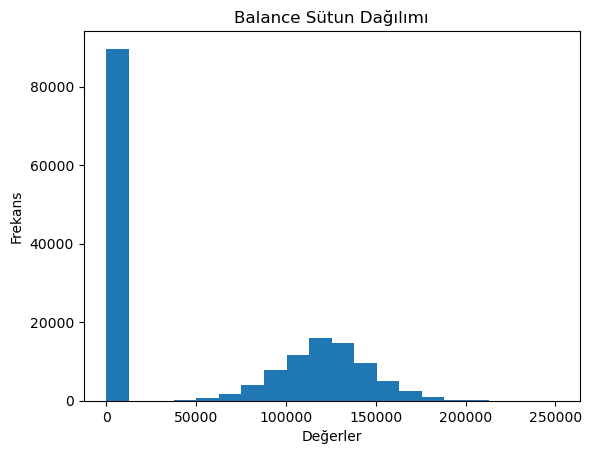

In [629]:
plt.hist(train['Balance'], bins=20)  # sütun_adı, incelemek istediğiniz sütunun adıdır
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.title('Balance Sütun Dağılımı')
plt.show()

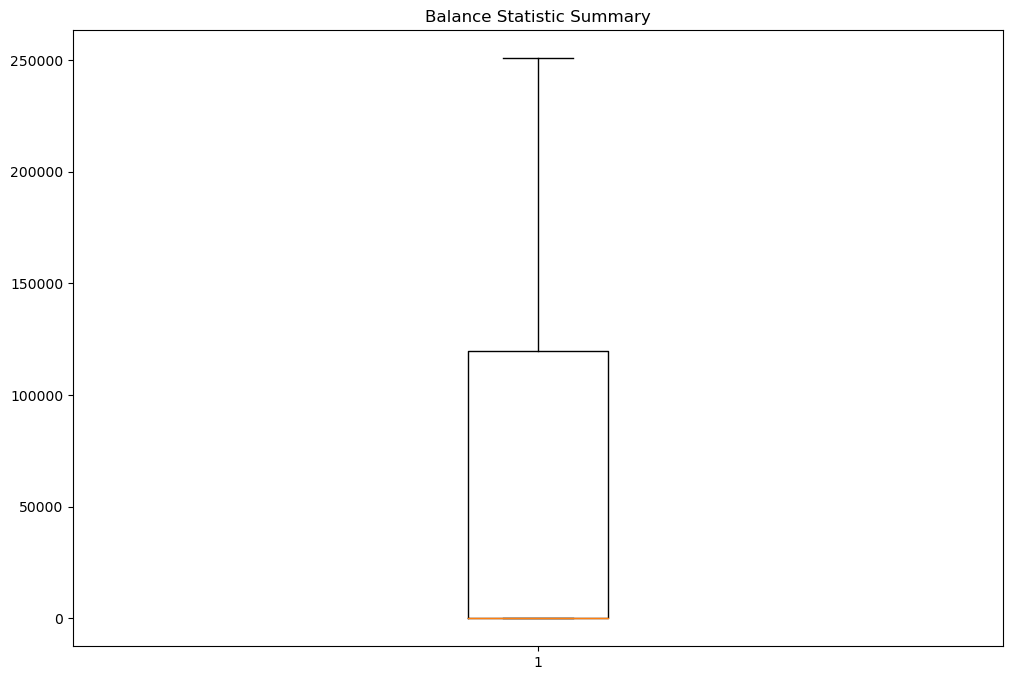

In [630]:
fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(train["Balance"])
ax.set_title('Balance'+' Statistic Summary')
plt.show()

In [631]:
zero_balance_customers = train[train['Balance'] == 0]

In [632]:
zero_balance_customers.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,89648.000000,8.964800e+04,89648.000000,89648.000000,89648.000000,89648.0,89648.000000,89648.000000,89648.000000,89648.000000,89648.000000
mean,82525.175118,1.569238e+07,655.878268,37.590346,5.048579,0.0,1.741221,0.762371,0.504774,112195.509506,0.161654
std,47625.572895,7.144134e+04,78.845087,8.635926,2.783255,0.0,0.481866,0.425633,0.499980,50472.263372,0.368136
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.0,1.000000,0.000000,0.000000,90.070000,0.000000
25%,41298.750000,1.563388e+07,597.000000,32.000000,3.000000,0.0,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,82607.500000,1.569019e+07,660.000000,36.000000,5.000000,0.0,2.000000,1.000000,1.000000,118035.005000,0.000000
75%,123715.250000,1.575692e+07,710.000000,41.000000,7.000000,0.0,2.000000,1.000000,1.000000,153920.220000,0.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,0.0,4.000000,1.000000,1.000000,199992.480000,1.000000


In [633]:
train_cleaned = train[train['Balance'] != 0]

In [634]:
train_cleaned.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,75386.000000,7.538600e+04,75386.000000,75386.000000,75386.000000,75386.000000,75386.000000,75386.000000,75386.000000,75386.000000,75386.000000
mean,82506.183668,1.569156e+07,657.139469,38.762747,4.986788,121451.868499,1.332356,0.743944,0.489441,113025.896837,0.270992
std,47660.433190,7.134396e+04,81.569608,9.093715,2.832806,25019.489928,0.537088,0.436456,0.499892,50075.286268,0.444475
min,3.000000,1.556570e+07,350.000000,18.000000,0.000000,18.330000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41213.500000,1.563252e+07,597.000000,33.000000,3.000000,105224.110000,1.000000,0.000000,0.000000,74800.975000,0.000000
50%,82424.500000,1.569008e+07,659.000000,38.000000,5.000000,122314.390000,1.000000,1.000000,0.000000,117832.445000,0.000000
75%,123846.750000,1.575647e+07,712.000000,44.000000,7.000000,137781.650000,2.000000,1.000000,1.000000,155876.435000,1.000000
max,165032.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [635]:
train['Zero_Balance_Flag'] = train['Balance'].apply(lambda x: 1 if x == 0 else 0)

# Balance verisi incelemesi
    Balance özelliği incelenmiş ve Balance değerinin 0 olan veri sayısının fazla olduğu tespit edilmiştir. Bu durum makinemizin doğruluk oranını düşüreceği için bir "Zero_Balance_Flag" oluşturulmuştur. Bu sayede Balance değeri 0 olan verilerin modelimizi etkilemesi engellenmiştir.

In [636]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,1
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0,1
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0,1
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0


In [637]:
train["Age"].unique()

array([33.  , 40.  , 34.  , 36.  , 30.  , 37.  , 43.  , 27.  , 71.  ,
       47.  , 25.  , 55.  , 61.  , 35.  , 41.  , 44.  , 26.  , 39.  ,
       31.  , 58.  , 49.  , 32.  , 50.  , 28.  , 45.  , 52.  , 29.  ,
       38.  , 54.  , 56.  , 46.  , 42.  , 64.  , 20.  , 21.  , 23.  ,
       48.  , 59.  , 51.  , 24.  , 53.  , 62.  , 57.  , 22.  , 66.  ,
       67.  , 19.  , 73.  , 60.  , 63.  , 65.  , 75.  , 68.  , 69.  ,
       76.  , 18.  , 70.  , 81.  , 74.  , 72.  , 77.  , 82.  , 79.  ,
       92.  , 80.  , 78.  , 83.  , 36.44, 85.  , 32.34, 84.  ])

In [638]:
train["Age"] = train["Age"].astype(int)

In [639]:
train["Age"].unique()

array([33, 40, 34, 36, 30, 37, 43, 27, 71, 47, 25, 55, 61, 35, 41, 44, 26,
       39, 31, 58, 49, 32, 50, 28, 45, 52, 29, 38, 54, 56, 46, 42, 64, 20,
       21, 23, 48, 59, 51, 24, 53, 62, 57, 22, 66, 67, 19, 73, 60, 63, 65,
       75, 68, 69, 76, 18, 70, 81, 74, 72, 77, 82, 79, 92, 80, 78, 83, 85,
       84])

In [640]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 165034 non-null  int64  
 1   CustomerId         165034 non-null  int64  
 2   Surname            165034 non-null  object 
 3   CreditScore        165034 non-null  int64  
 4   Geography          165034 non-null  object 
 5   Gender             165034 non-null  object 
 6   Age                165034 non-null  int32  
 7   Tenure             165034 non-null  int64  
 8   Balance            165034 non-null  float64
 9   NumOfProducts      165034 non-null  int64  
 10  HasCrCard          165034 non-null  float64
 11  IsActiveMember     165034 non-null  float64
 12  EstimatedSalary    165034 non-null  float64
 13  Exited             165034 non-null  int64  
 14  Zero_Balance_Flag  165034 non-null  int64  
dtypes: float64(4), int32(1), int64(7), object(3)
memory

# Yaş Kolonu
    Yaş kolonunda bazı verilerin virgüllü olduğu tespit edilmiş ve bu veriler int veri tipine çevirilmiştir
   

In [641]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,1.0,1.0,15068.83,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33,2,0.00,1,1.0,1.0,131834.75,0,1
165030,165030,15665521,Okechukwu,792,France,Male,35,3,0.00,1,0.0,0.0,131834.45,0,1
165031,165031,15664752,Hsia,565,France,Male,31,5,0.00,1,1.0,1.0,127429.56,0,1
165032,165032,15689614,Hsiung,554,Spain,Female,30,7,161533.00,1,0.0,1.0,71173.03,0,0


In [642]:
train['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

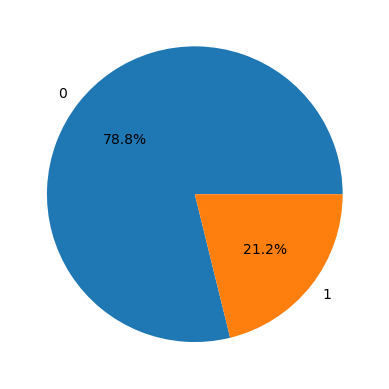

In [643]:
plt.pie(train['Exited'].value_counts(), labels = ("0","1"), autopct='%1.1f%%')
plt.show()

# Grafikleştirme

In [644]:
crosstab = pd.crosstab(train['Geography'], train['Gender'])

In [645]:
train["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

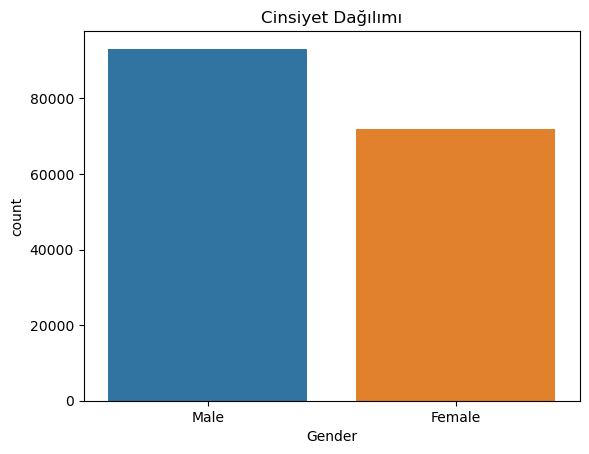

In [646]:
sns.countplot(x='Gender', data=train)
plt.title('Cinsiyet Dağılımı')
plt.show()

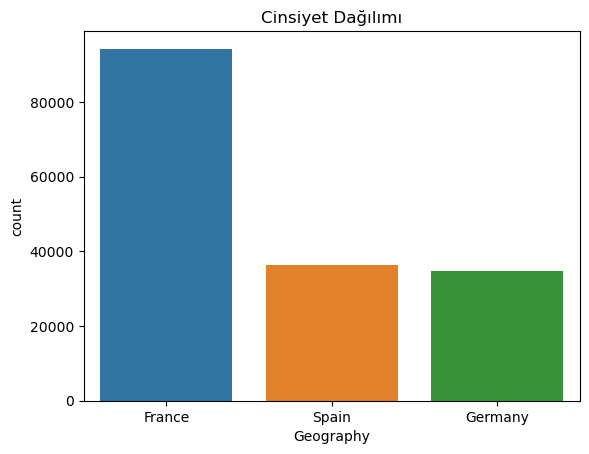

In [647]:
sns.countplot(x='Geography', data=train)
plt.title('Cinsiyet Dağılımı')
plt.show()

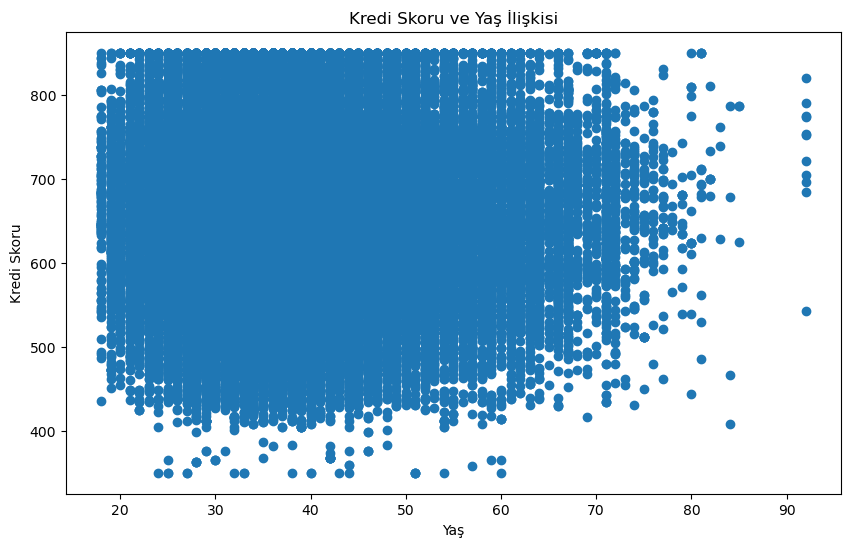

In [648]:
plt.figure(figsize=(10, 6))
plt.scatter(train["Age"], train["CreditScore"])
plt.title('Kredi Skoru ve Yaş İlişkisi')
plt.xlabel('Yaş')
plt.ylabel('Kredi Skoru')
plt.show()

In [649]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,1.0,1.0,15068.83,0,1


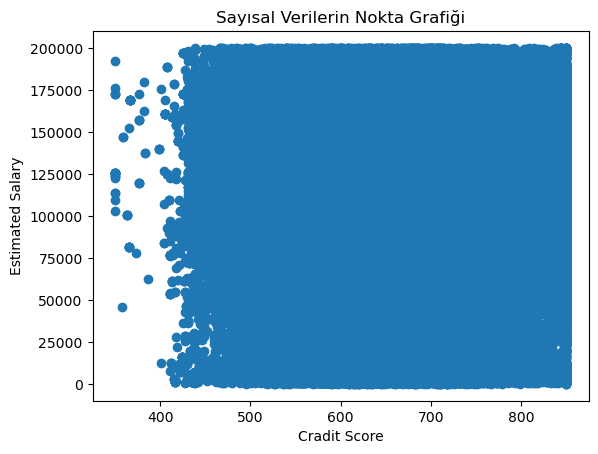

In [650]:
plt.scatter(train['CreditScore'], train['EstimatedSalary'])
plt.xlabel('Cradit Score')
plt.ylabel('Estimated Salary')
plt.title('Sayısal Verilerin Nokta Grafiği')
plt.show()

In [651]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,1.0,1.0,15068.83,0,1


# VERİ ÖN TEMİZLEME

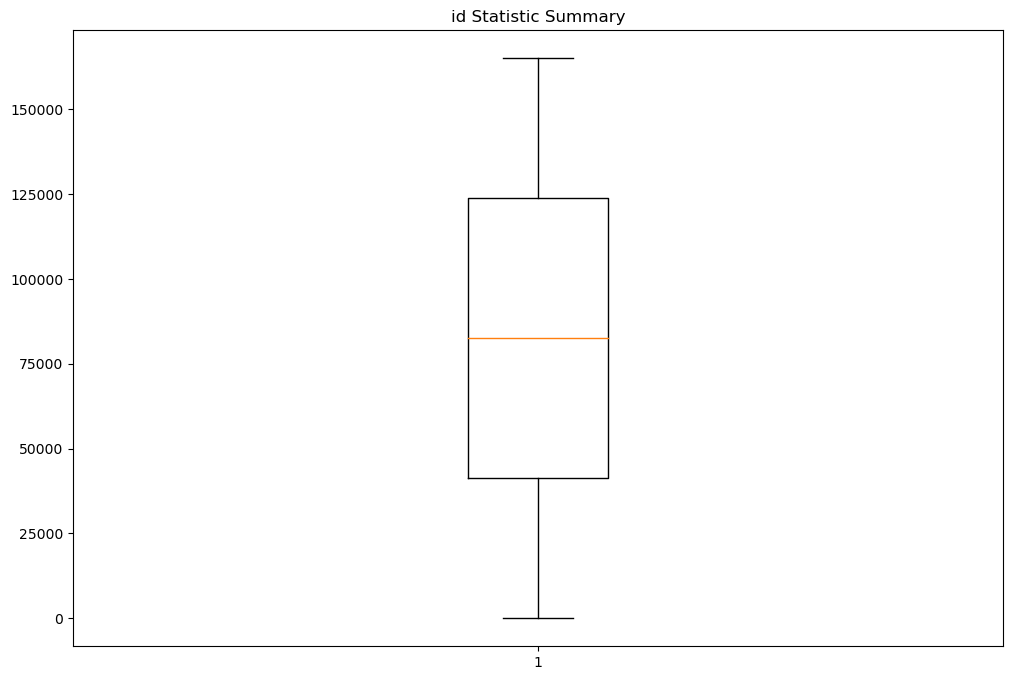

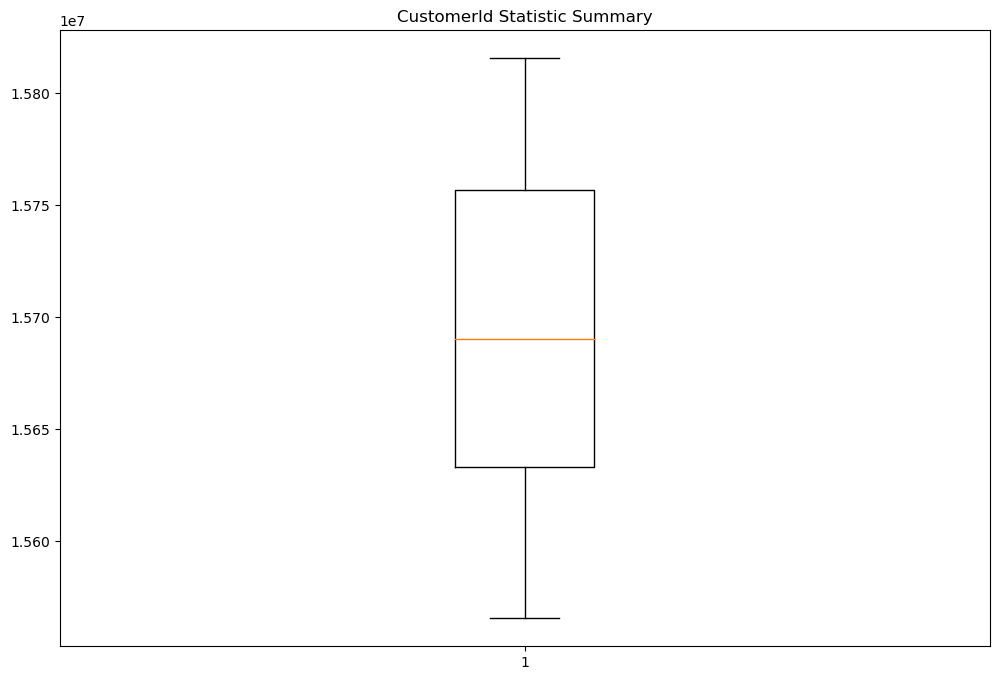

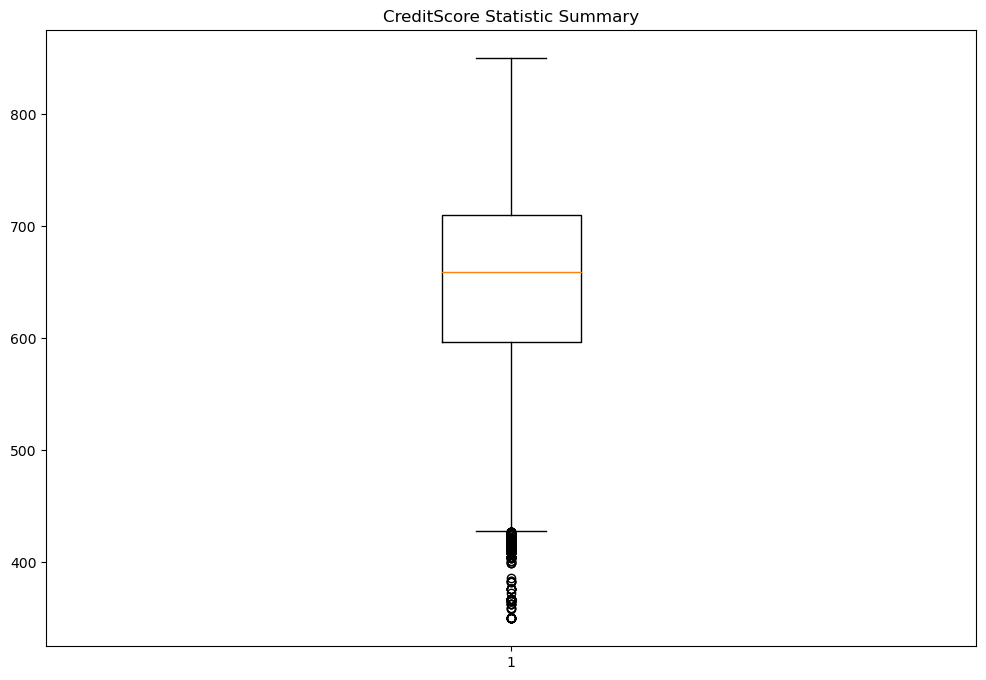

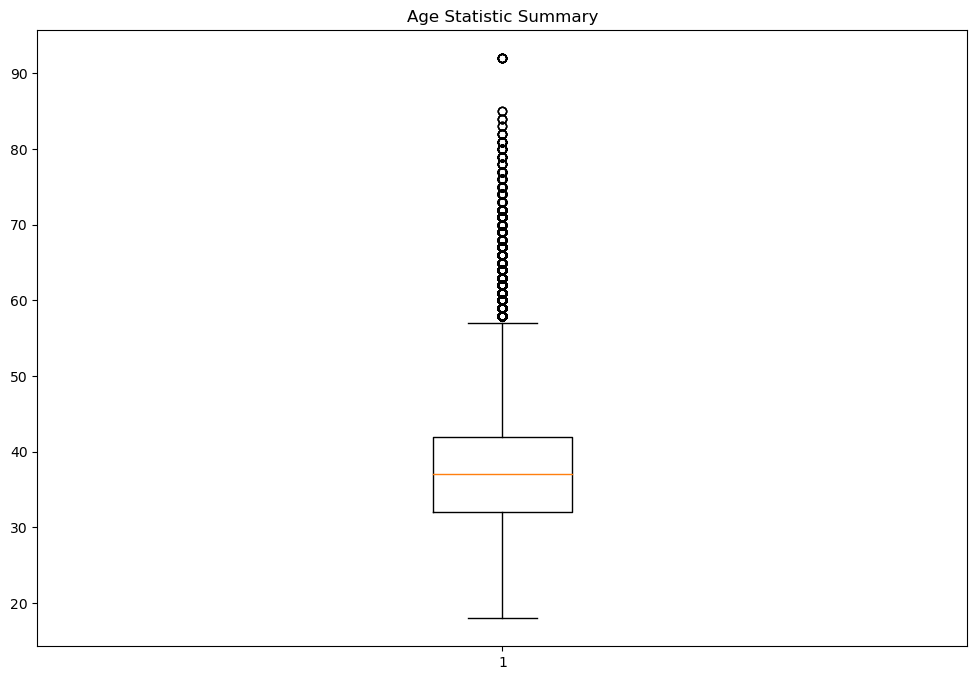

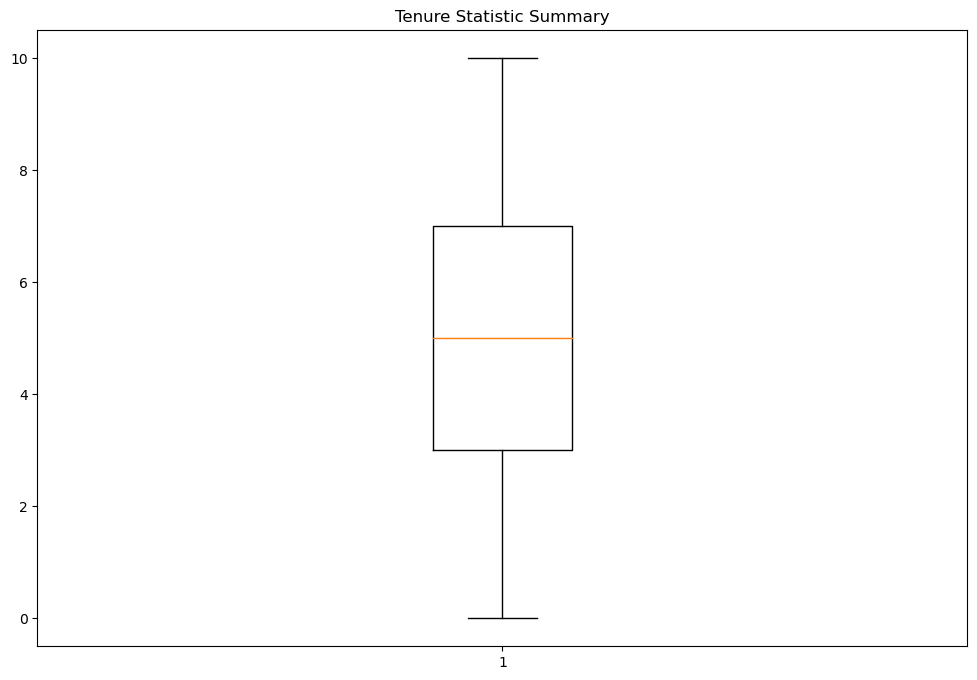

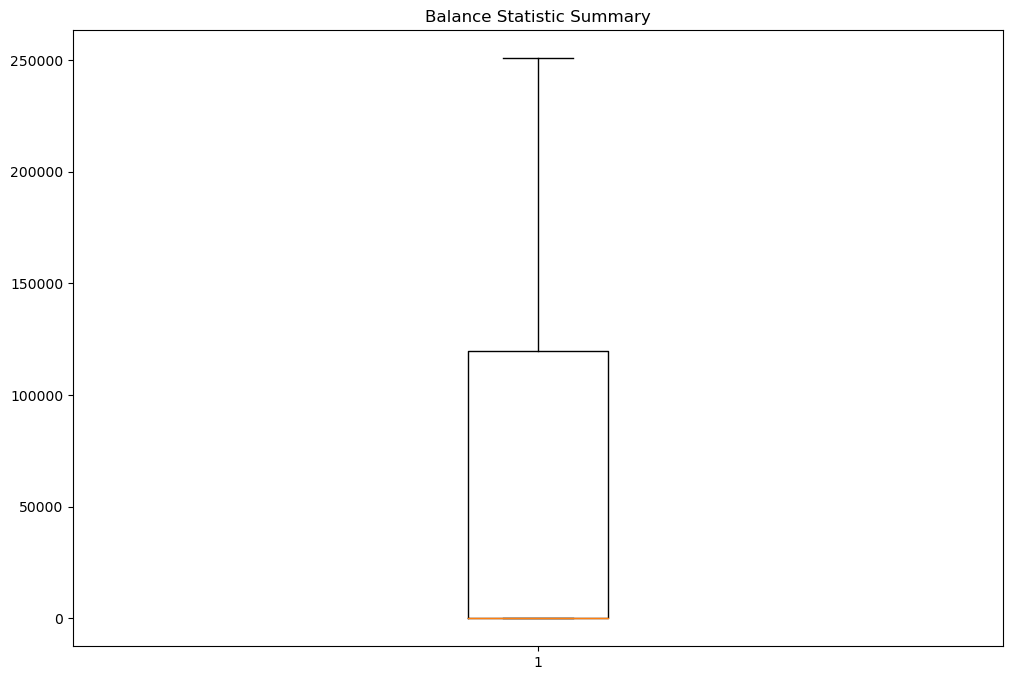

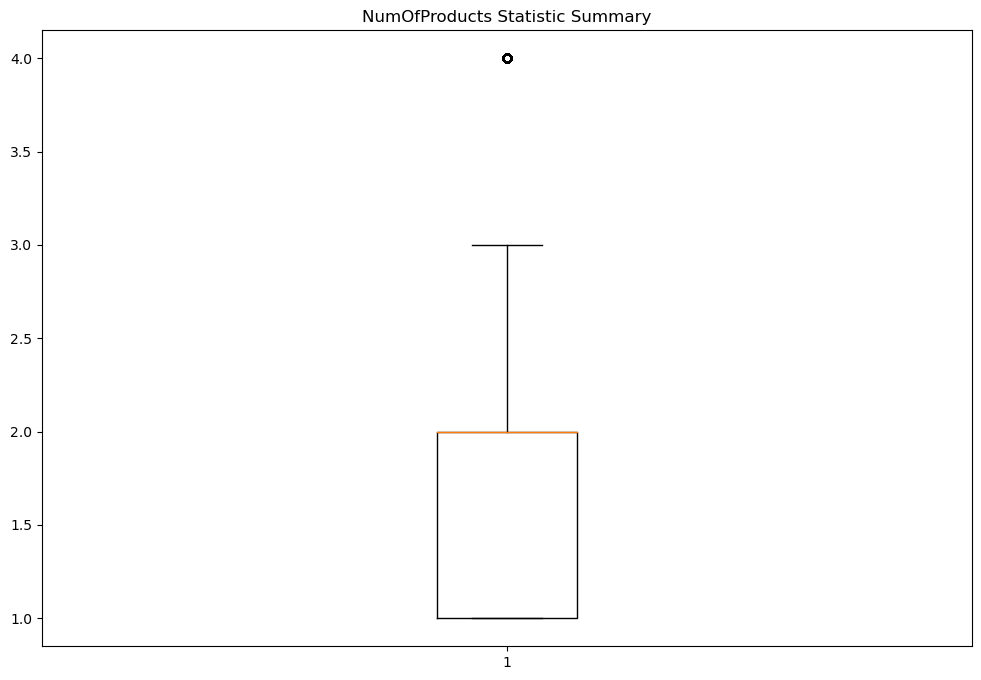

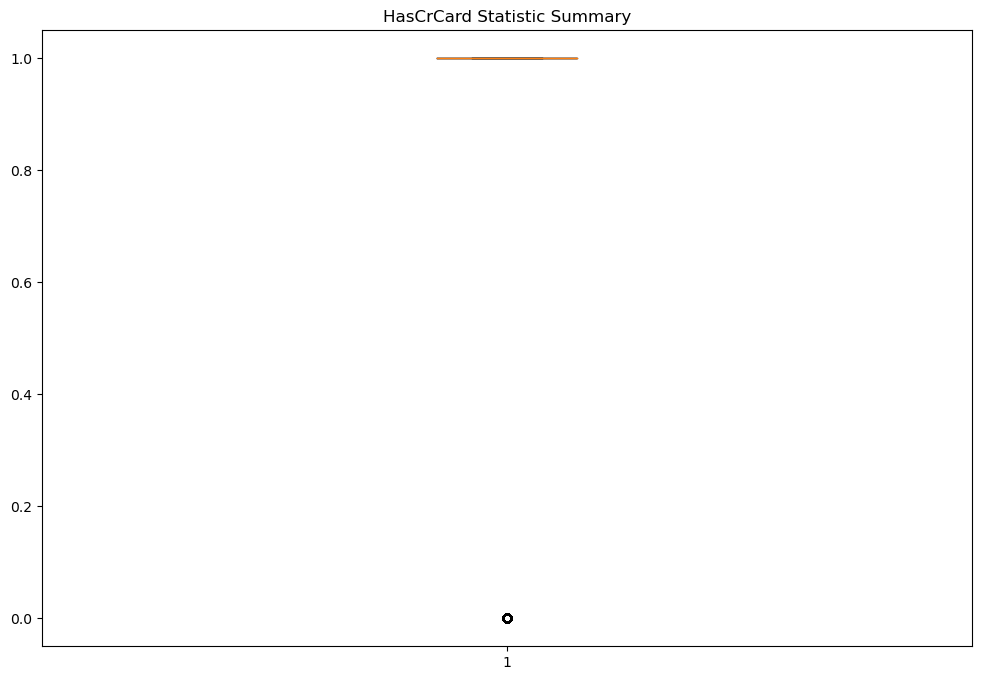

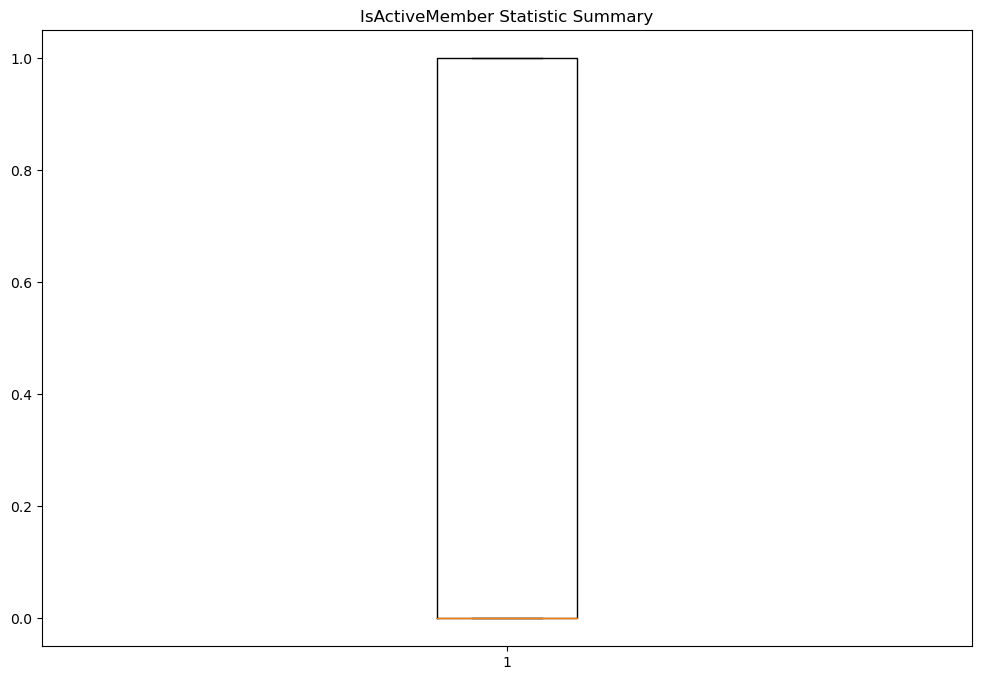

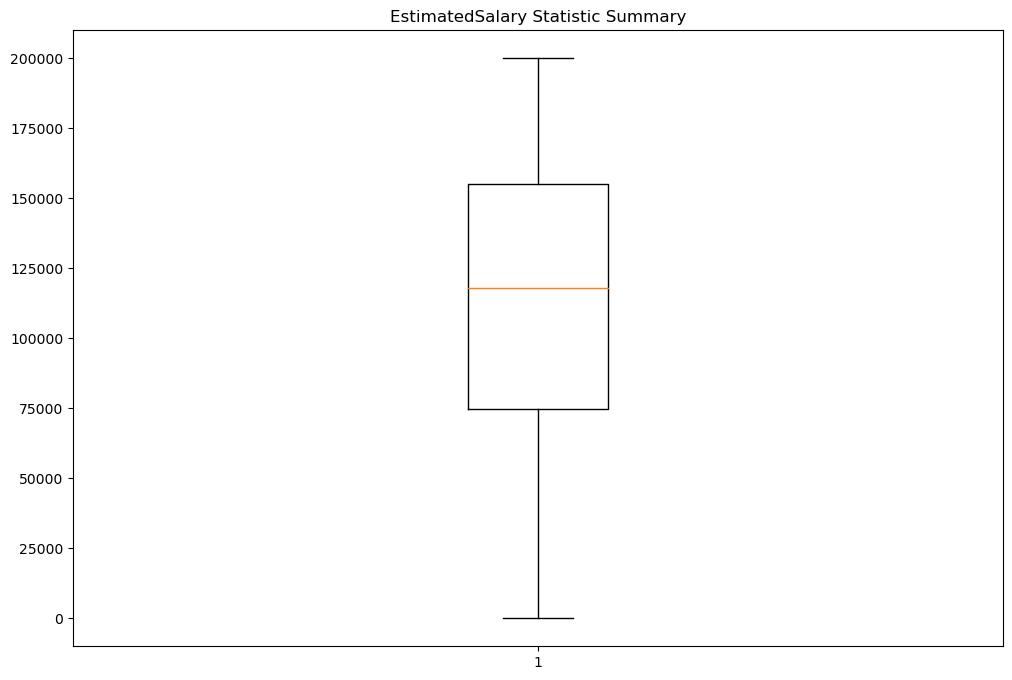

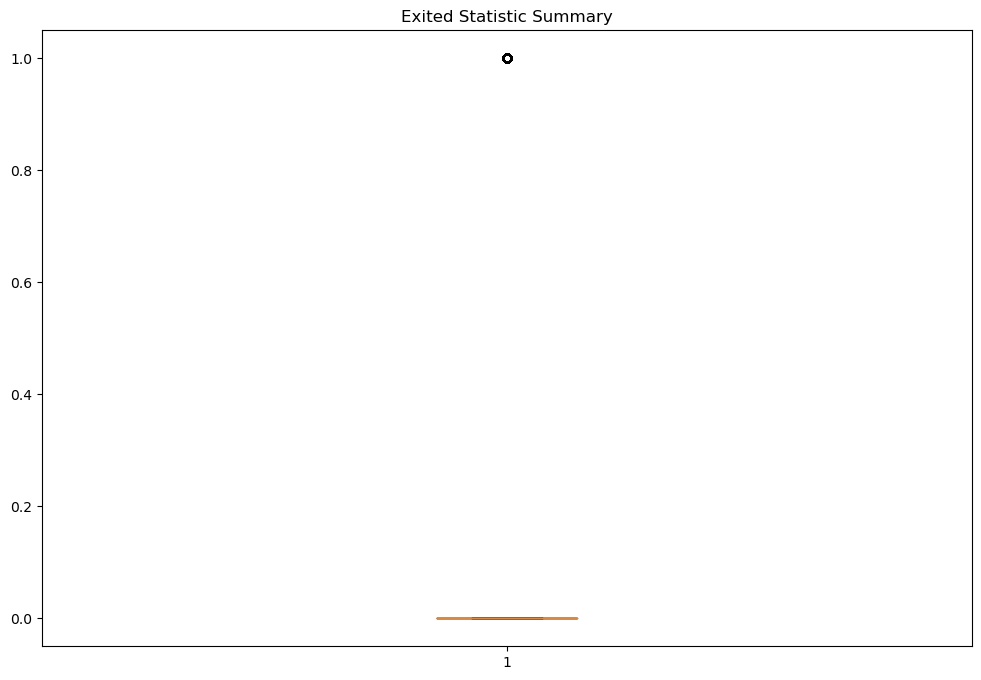

In [652]:
for i in sayısal_sütunlar:
    fig, ax = plt.subplots(figsize=(12,8))
    ax.boxplot(train[i])
    ax.set_title(i+' Statistic Summary')
    plt.show()

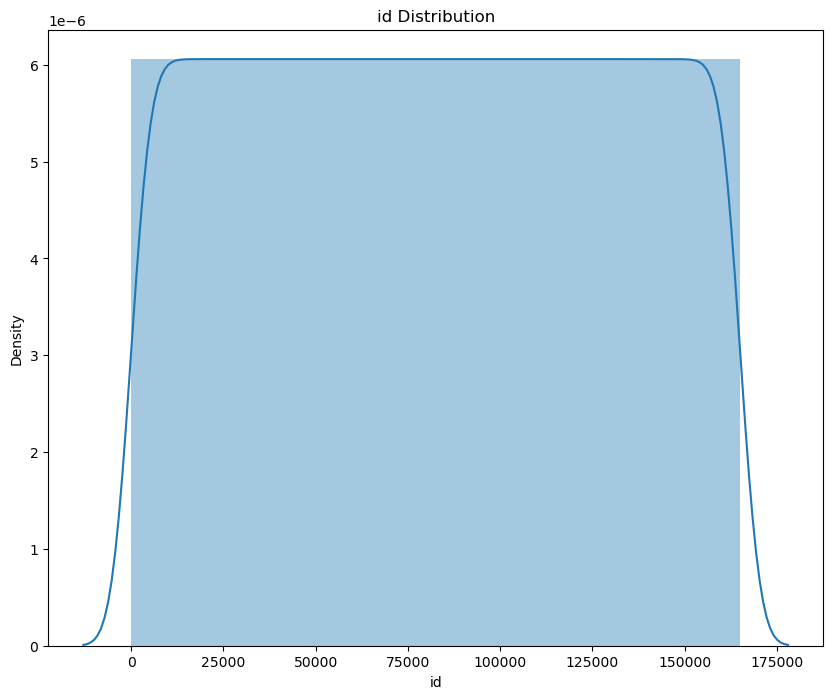

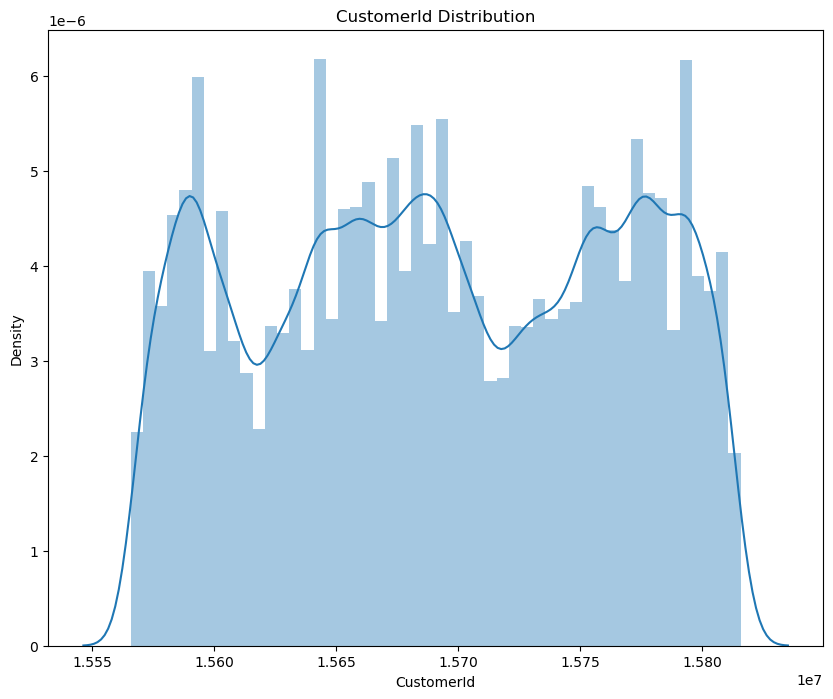

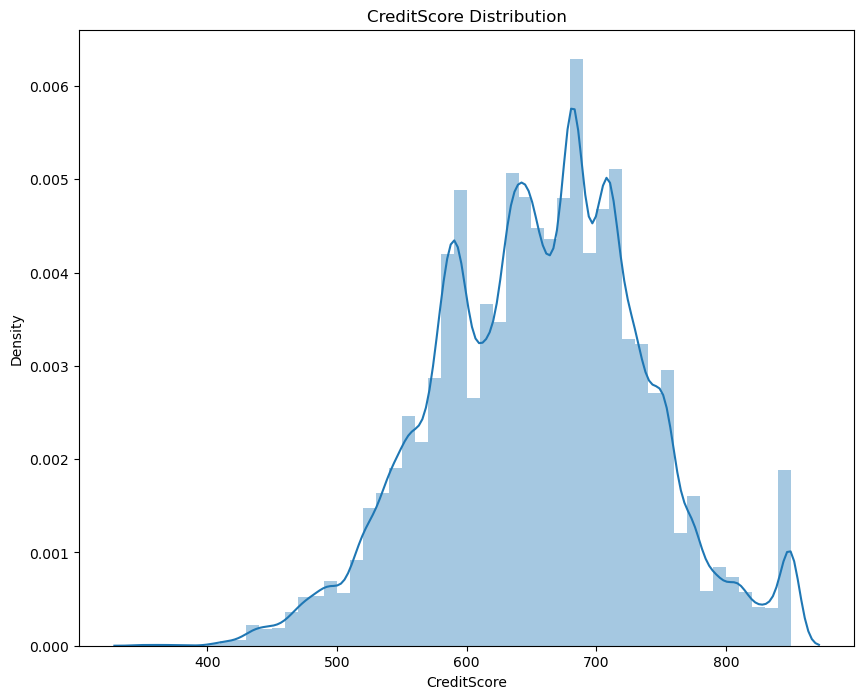

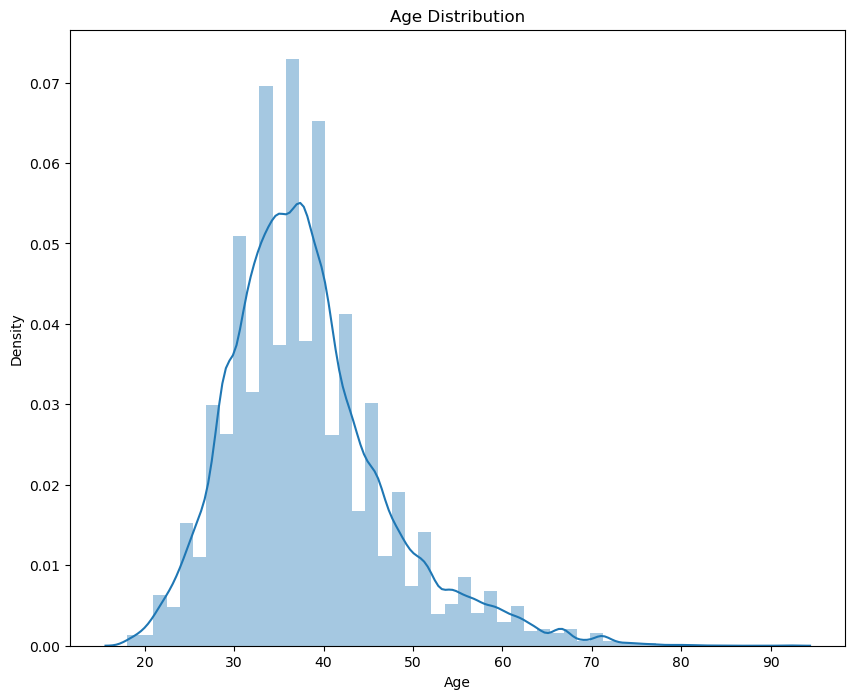

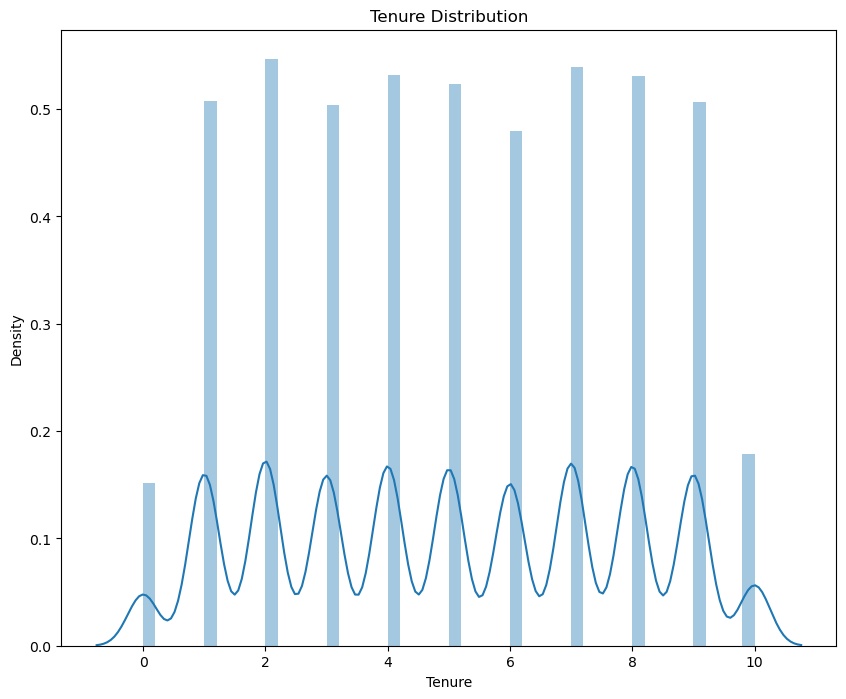

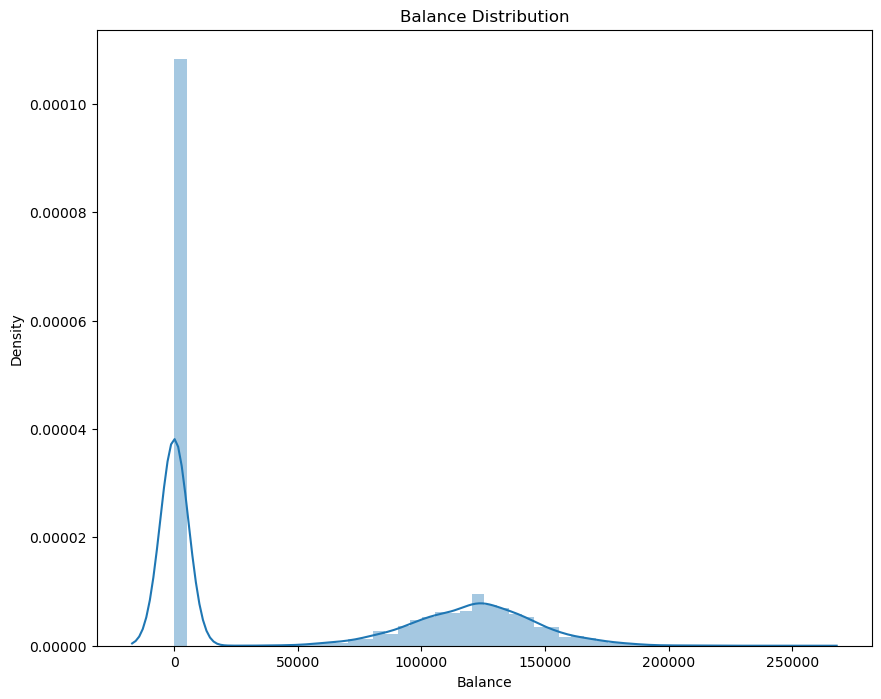

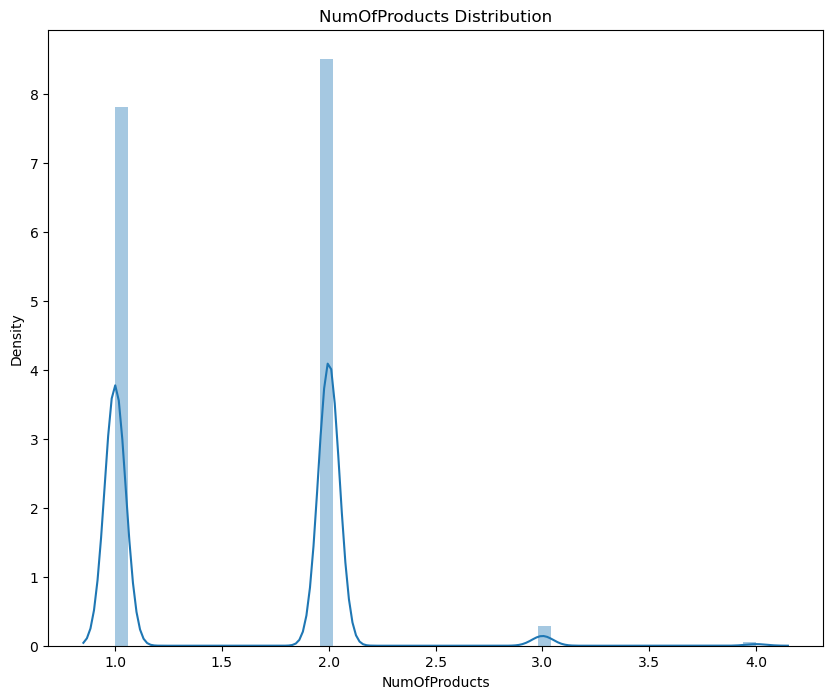

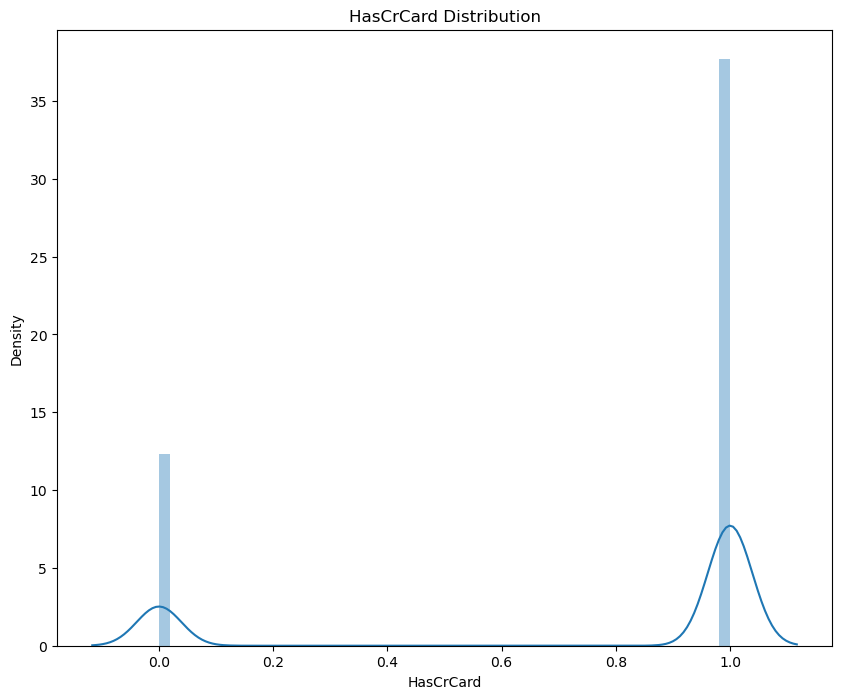

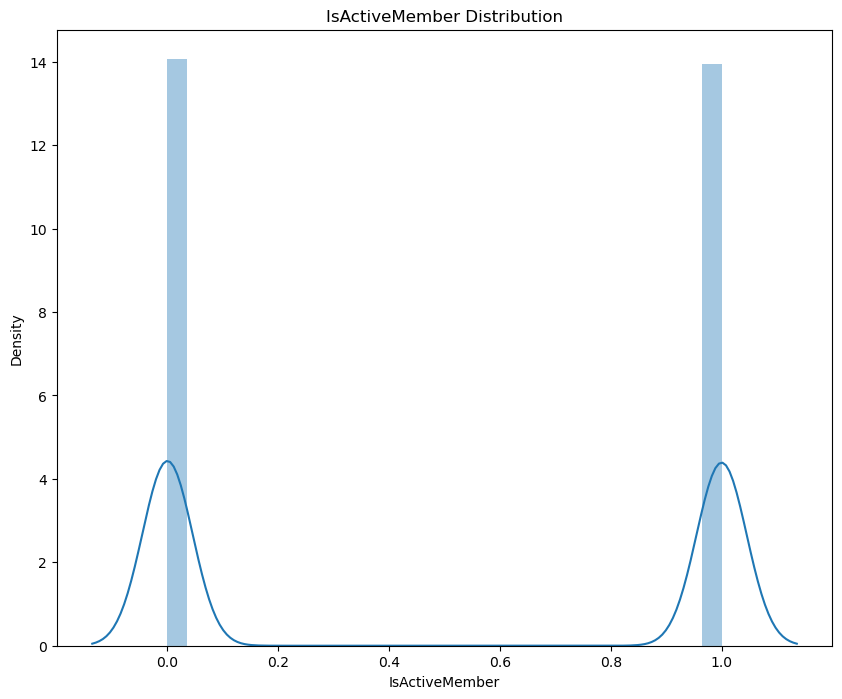

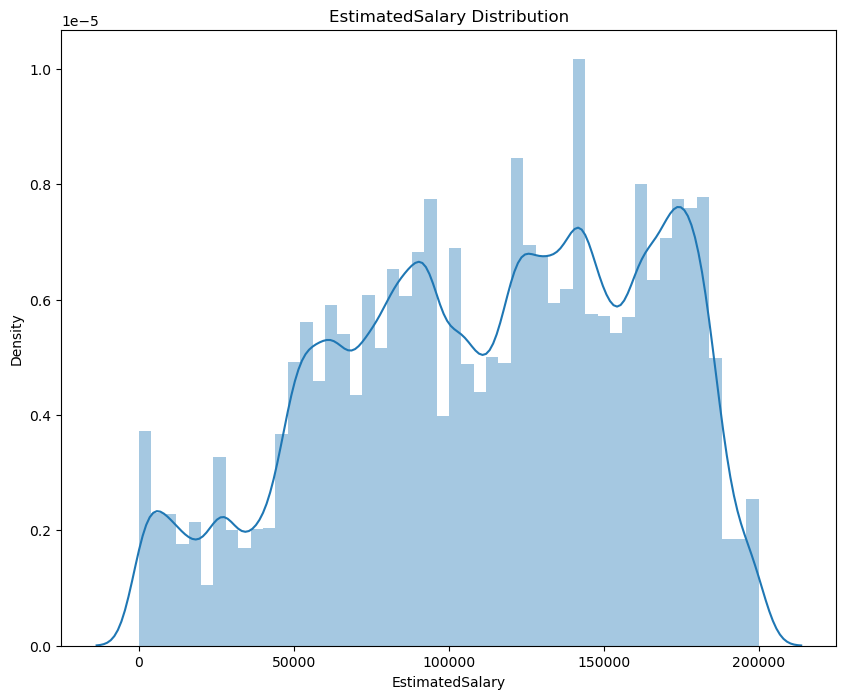

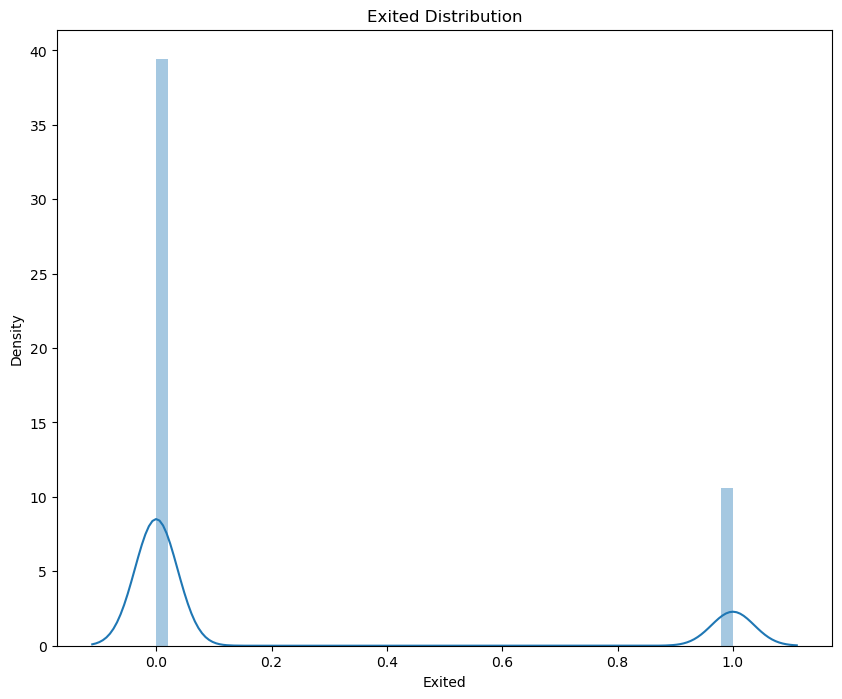

In [653]:
for i in sayısal_sütunlar:
    fig,ax = plt.subplots(figsize=(10,8))
    ax = sns.distplot(train[i])
    ax.set_title(i+' Distribution')
    plt.show()

In [654]:
train["CreditScore"]

0         668
1         627
2         678
3         581
4         716
         ... 
165029    667
165030    792
165031    565
165032    554
165033    850
Name: CreditScore, Length: 165034, dtype: int64

In [655]:
Q1 = train['CreditScore'].quantile(0.25)
Q3 = train['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

In [656]:
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

In [657]:
outliers = train[(train['CreditScore'] < lower_fence) | (train['CreditScore'] > upper_fence)]
print("Tukey's Fences yöntemiyle tespit edilen aykırı değerler:")
outliers

Tukey's Fences yöntemiyle tespit edilen aykırı değerler:


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
35,35,15661591,Panicucci,413,Germany,Male,28,3,130969.77,2,1.0,1.0,158891.79,0,0
169,169,15612494,Panicucci,359,France,Female,44,6,128747.69,1,0.0,1.0,146955.71,0,0
705,705,15597131,Fanucci,415,France,Male,32,5,145807.59,2,1.0,0.0,3064.65,0,0
1161,1161,15711396,Henderson,427,Spain,Male,39,8,0.00,2,1.0,1.0,82870.75,0,1
2037,2037,15791533,Ch'ien,367,Spain,Female,35,6,93608.28,2,0.0,1.0,168816.73,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162911,162911,15661591,Panicucci,413,France,Female,39,5,130969.77,2,1.0,1.0,158891.79,0,0
163765,163765,15775888,Lo,418,Spain,Female,28,7,71269.89,1,0.0,0.0,125912.77,0,0
164420,164420,15668309,Maslow,350,France,Female,40,1,111098.85,1,1.0,1.0,172321.21,0,0
164439,164439,15600708,Sagese,427,Spain,Female,34,4,0.00,2,1.0,0.0,479.54,0,1


In [658]:
train_clean = train[(train['CreditScore'] >= lower_fence) & (train['CreditScore'] <= upper_fence)]
train_clean

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,1.0,1.0,15068.83,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33,2,0.00,1,1.0,1.0,131834.75,0,1
165030,165030,15665521,Okechukwu,792,France,Male,35,3,0.00,1,0.0,0.0,131834.45,0,1
165031,165031,15664752,Hsia,565,France,Male,31,5,0.00,1,1.0,1.0,127429.56,0,1
165032,165032,15689614,Hsiung,554,Spain,Female,30,7,161533.00,1,0.0,1.0,71173.03,0,0


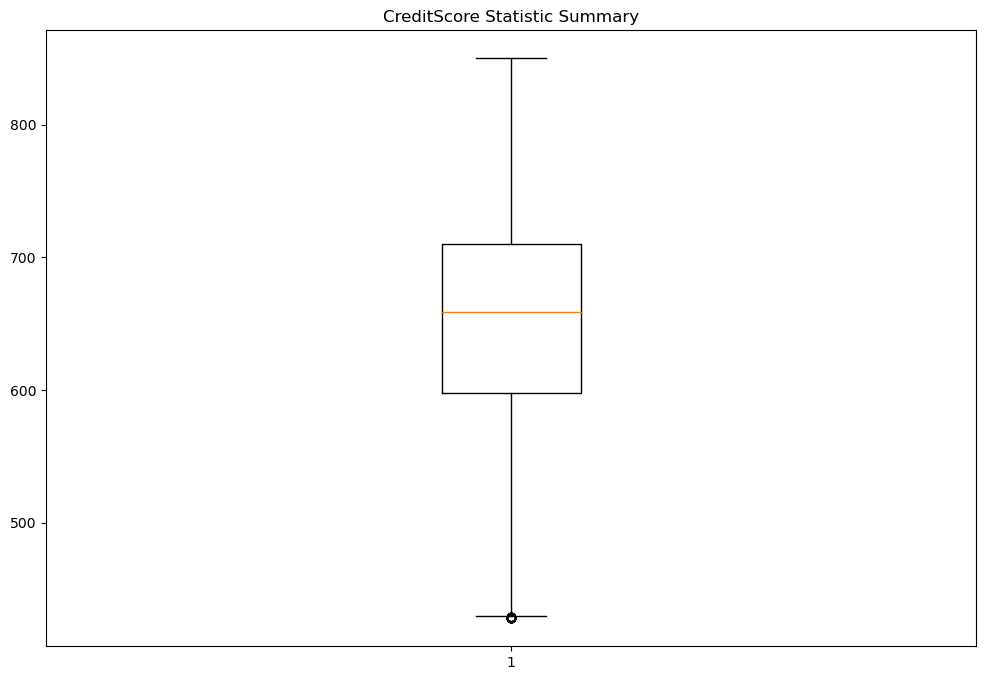

In [659]:
fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(train_clean['CreditScore'])
ax.set_title('CreditScore'+' Statistic Summary')
plt.show()

In [660]:
train_clean["Age"].describe()

count    164781.000000
mean         38.124832
std           8.866241
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

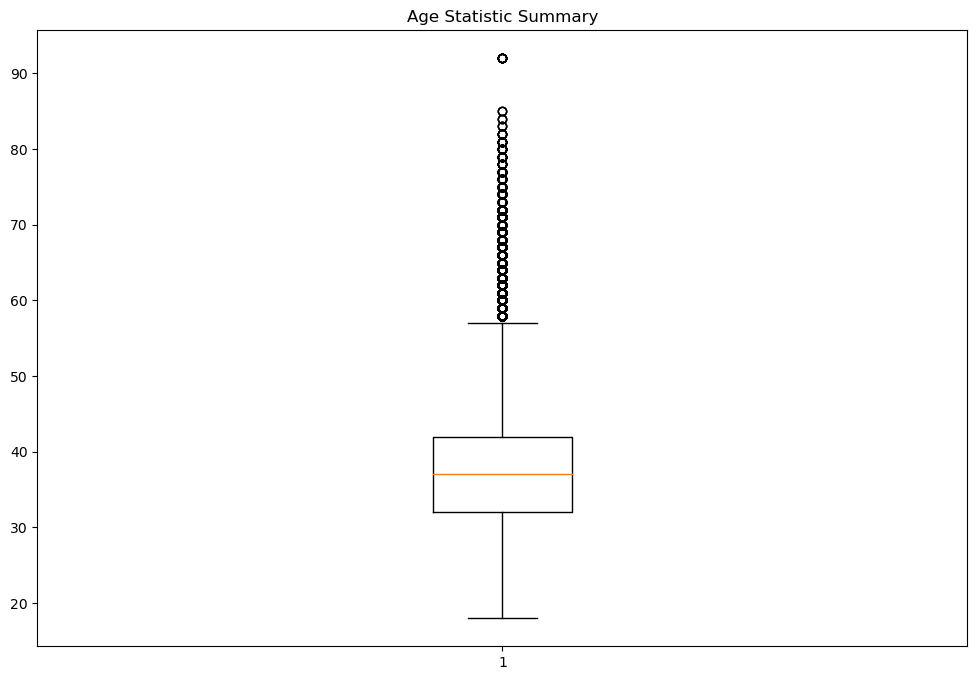

In [661]:
fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(train_clean['Age'])
ax.set_title('Age'+' Statistic Summary')
plt.show()

In [662]:
Q1 = train_clean['Age'].quantile(0.25)
Q3 = train_clean['Age'].quantile(0.75)
IQR = Q3 - Q1

In [663]:
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

In [664]:
outliers = train_clean[(train_clean['Age'] < lower_fence) | (train_clean['Age'] > upper_fence)]
outliers.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
count,6381.000000,6.381000e+03,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000
mean,82942.457922,1.569356e+07,656.702868,63.271431,4.914904,60547.517102,1.485190,0.739383,0.699263,108731.120008,0.383796,0.502899
std,47834.769892,7.173035e+04,82.426198,4.978667,2.849209,63600.686352,0.595154,0.439006,0.458614,51986.309435,0.486347,0.500031
min,12.000000,1.556576e+07,429.000000,58.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,0.000000
25%,41715.000000,1.563550e+07,597.000000,59.000000,2.000000,0.000000,1.000000,0.000000,0.000000,67611.360000,0.000000,0.000000
50%,82166.000000,1.569163e+07,657.000000,62.000000,5.000000,0.000000,1.000000,1.000000,1.000000,110932.240000,0.000000,1.000000
75%,124455.000000,1.575763e+07,712.000000,66.000000,7.000000,121874.890000,2.000000,1.000000,1.000000,153917.350000,1.000000,1.000000
max,165026.000000,1.581563e+07,850.000000,92.000000,10.000000,216109.880000,4.000000,1.000000,1.000000,199862.380000,1.000000,1.000000


In [665]:
train_clean.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
count,164781.000000,1.647810e+05,164781.000000,164781.000000,164781.000000,164781.000000,164781.000000,164781.000000,164781.000000,164781.000000,164781.000000,164781.000000
mean,82512.265607,1.569201e+07,656.839247,38.124832,5.019960,55480.827220,1.554451,0.753940,0.497794,112590.929396,0.211578,0.543188
std,47640.581576,7.139593e+04,79.554445,8.866241,2.805731,62817.640285,0.547106,0.430715,0.499997,50288.100787,0.408428,0.498133
min,0.000000,1.556570e+07,428.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000
25%,41251.000000,1.563314e+07,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000,0.000000
50%,82513.000000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.100000,0.000000,1.000000
75%,123771.000000,1.575682e+07,710.000000,42.000000,7.000000,119939.590000,2.000000,1.000000,1.000000,155155.250000,0.000000,1.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000


In [666]:
train_clean = train_clean[(train_clean['Age'] >= lower_fence) & (train_clean['Age'] <= upper_fence)]
train_clean

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,1.0,1.0,15068.83,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33,2,0.00,1,1.0,1.0,131834.75,0,1
165030,165030,15665521,Okechukwu,792,France,Male,35,3,0.00,1,0.0,0.0,131834.45,0,1
165031,165031,15664752,Hsia,565,France,Male,31,5,0.00,1,1.0,1.0,127429.56,0,1
165032,165032,15689614,Hsiung,554,Spain,Female,30,7,161533.00,1,0.0,1.0,71173.03,0,0


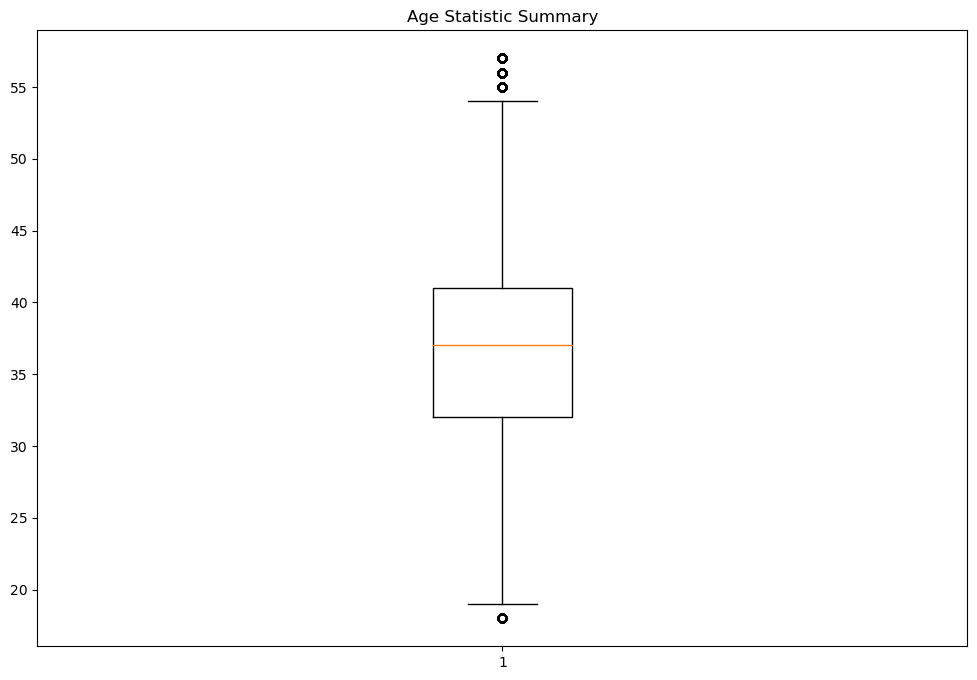

In [667]:
fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(train_clean['Age'])
ax.set_title('Age'+' Statistic Summary')
plt.show()

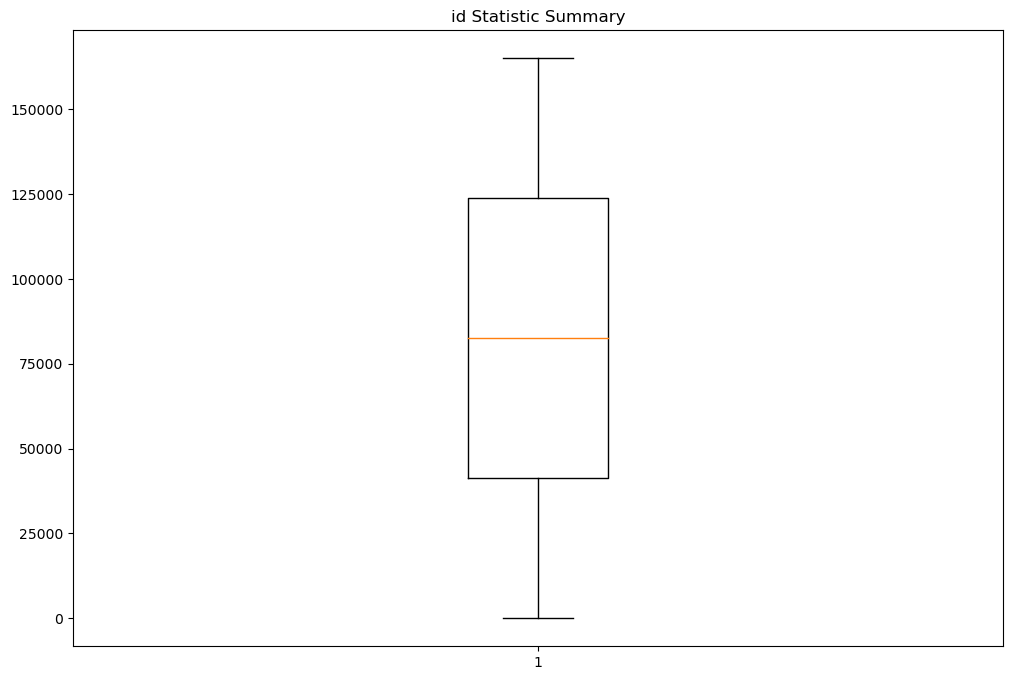

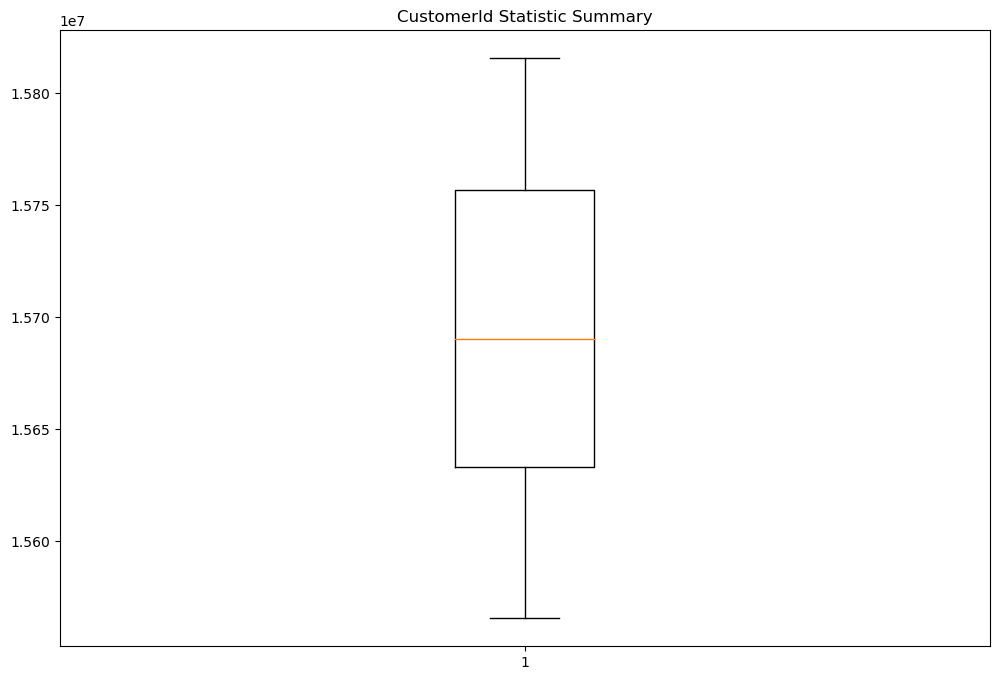

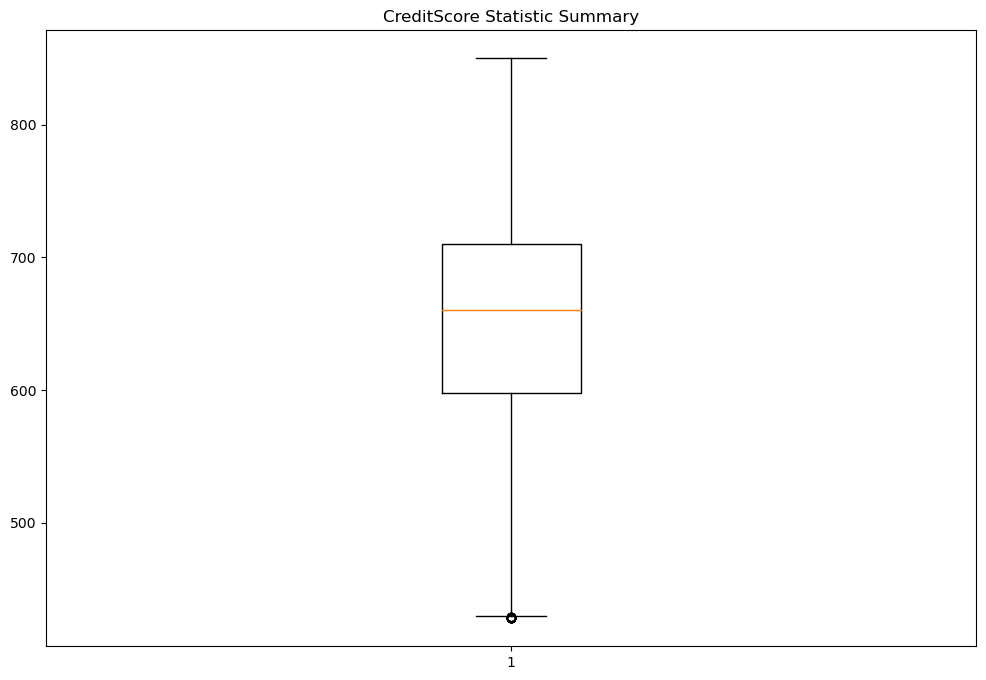

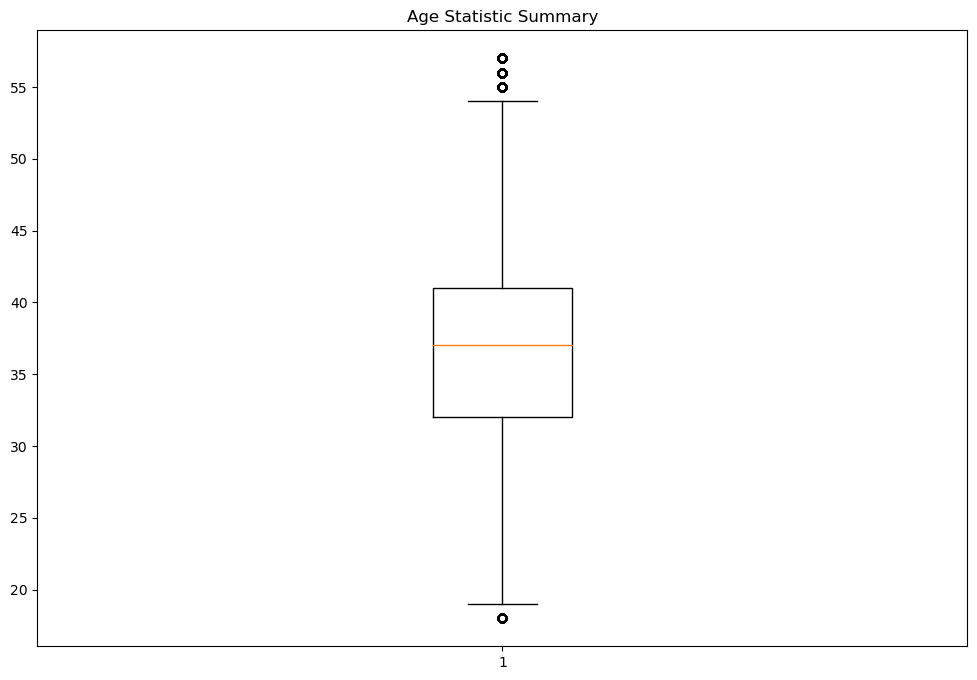

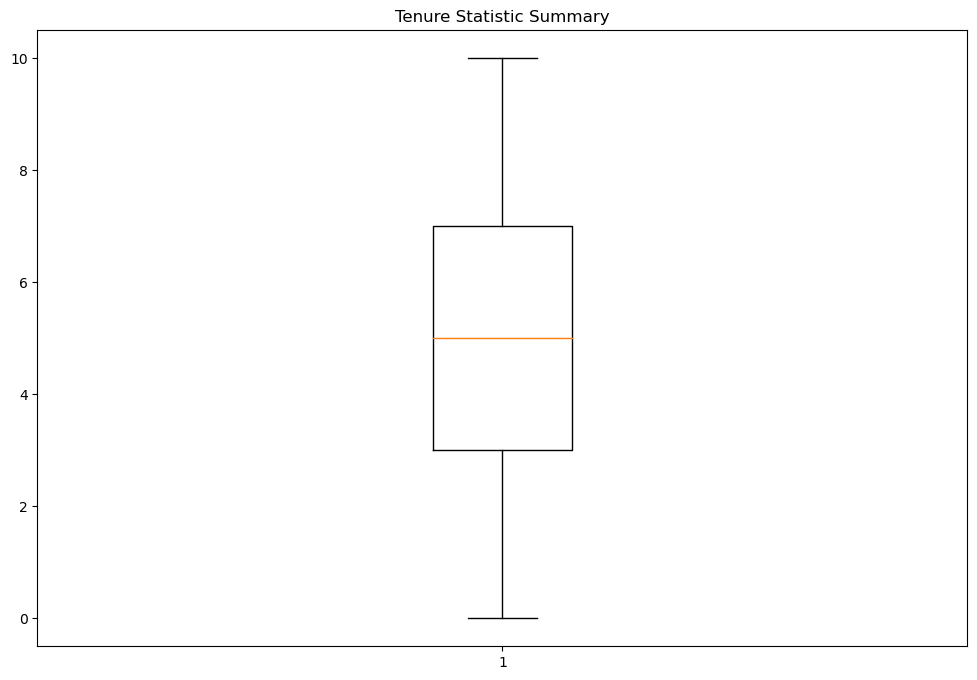

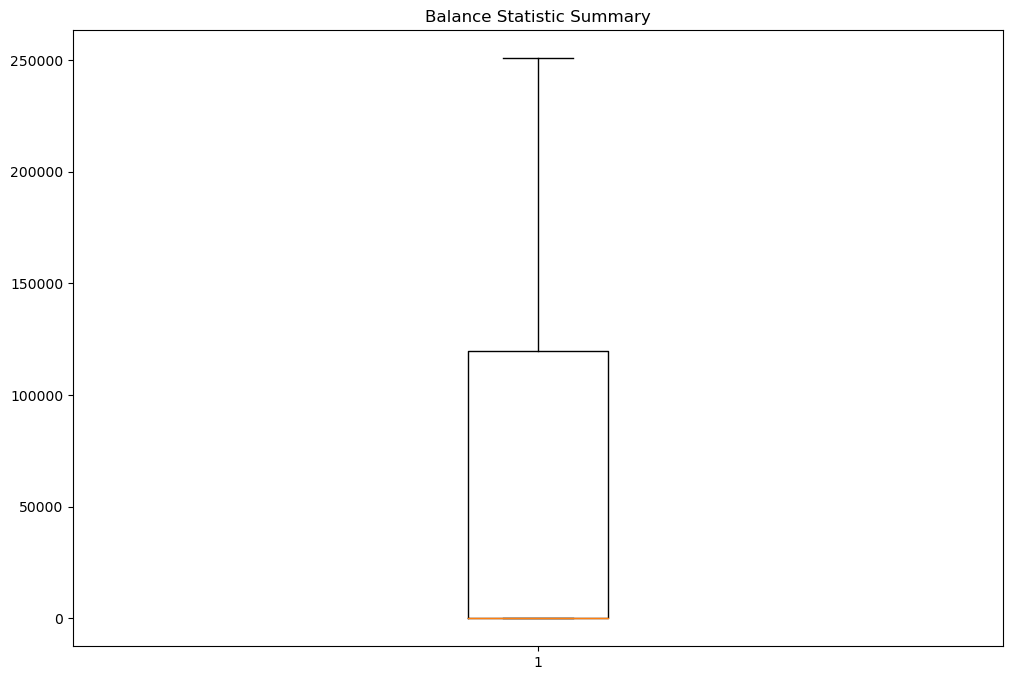

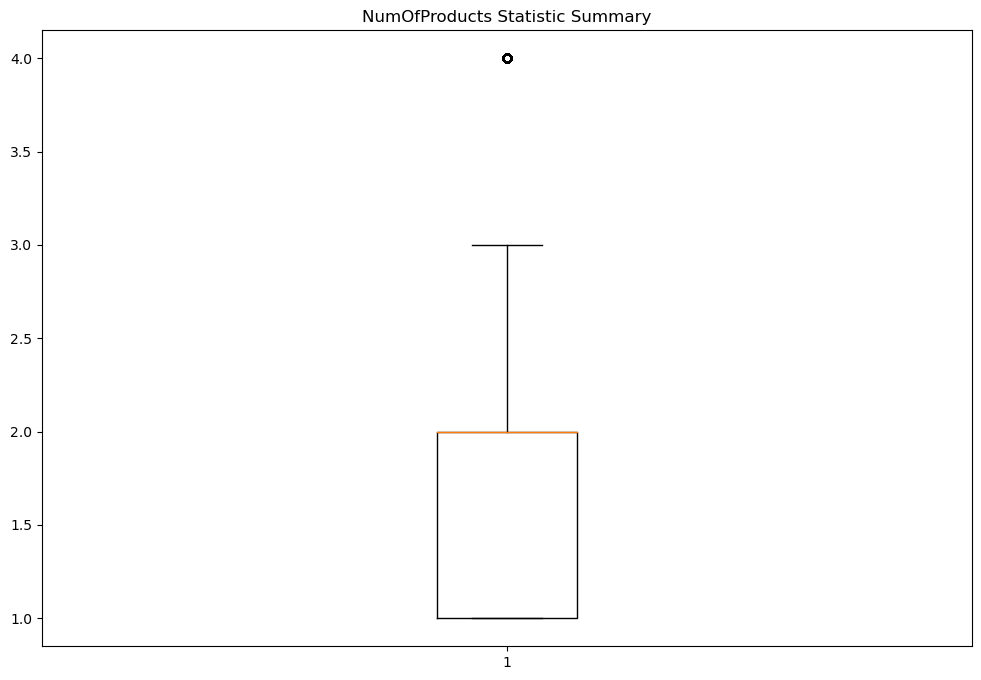

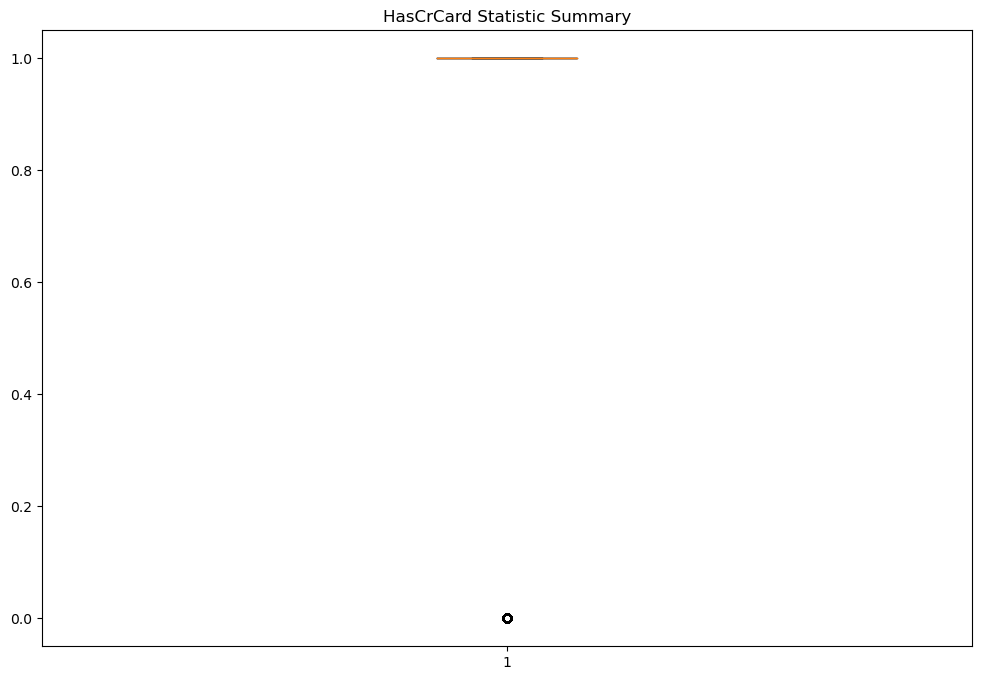

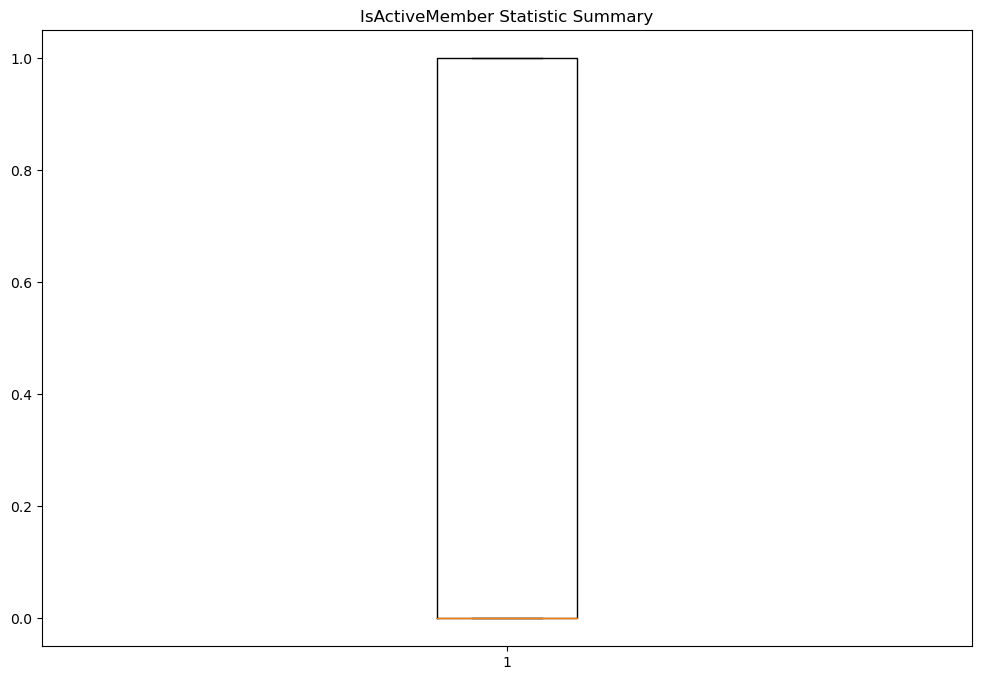

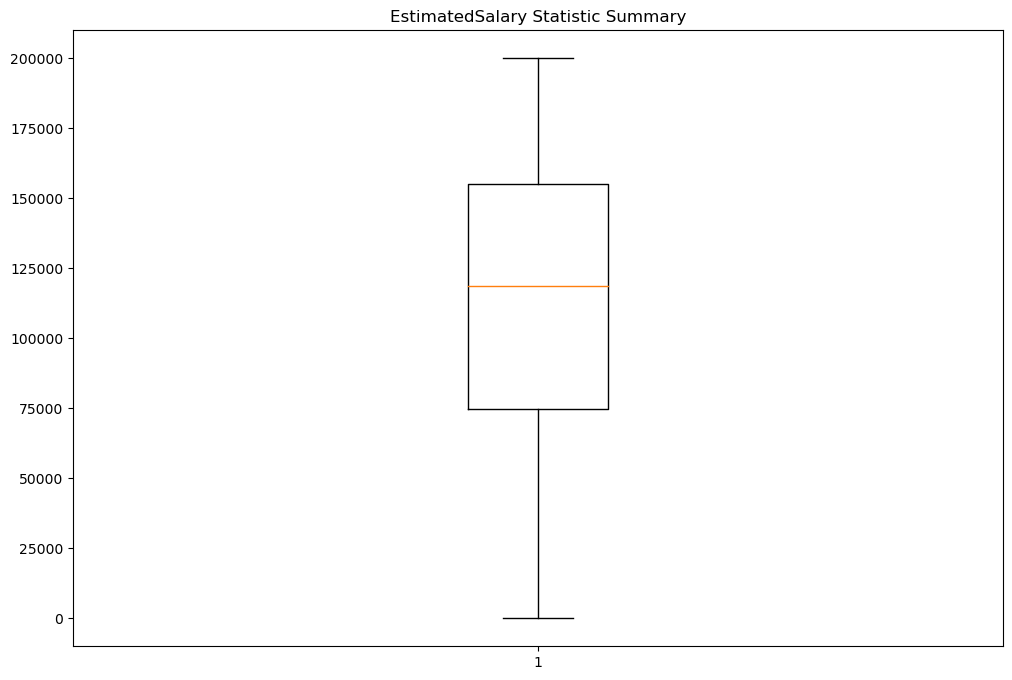

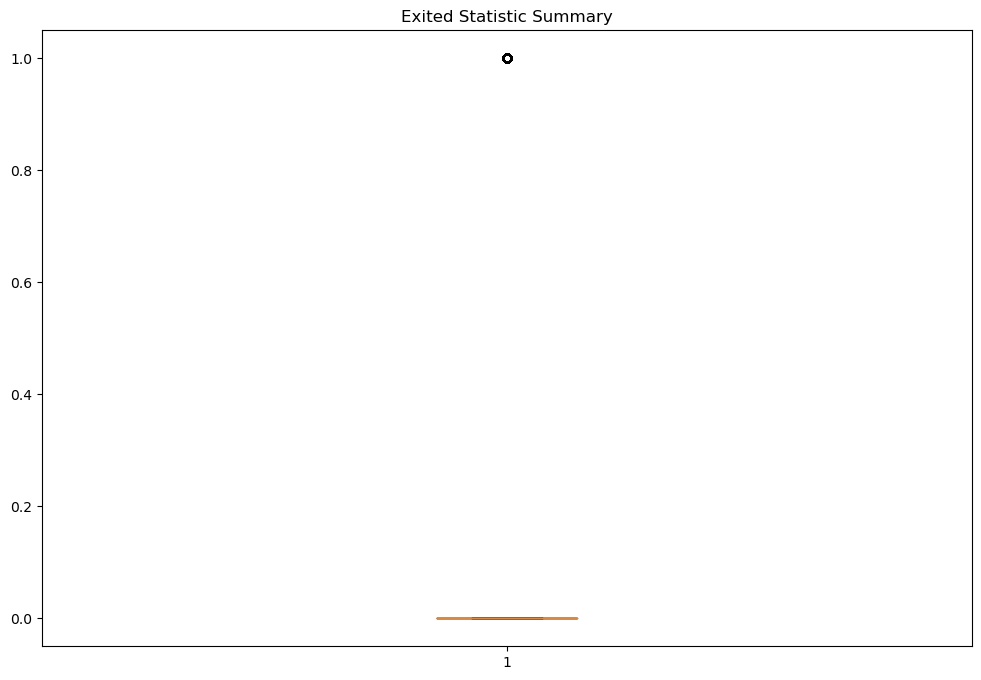

In [668]:
for i in sayısal_sütunlar:
    fig, ax = plt.subplots(figsize=(12,8))
    ax.boxplot(train_clean[i])
    ax.set_title(i+' Statistic Summary')
    plt.show()

In [669]:
train_clean

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,1.0,1.0,15068.83,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33,2,0.00,1,1.0,1.0,131834.75,0,1
165030,165030,15665521,Okechukwu,792,France,Male,35,3,0.00,1,0.0,0.0,131834.45,0,1
165031,165031,15664752,Hsia,565,France,Male,31,5,0.00,1,1.0,1.0,127429.56,0,1
165032,165032,15689614,Hsiung,554,Spain,Female,30,7,161533.00,1,0.0,1.0,71173.03,0,0


In [670]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158400 entries, 0 to 165033
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 158400 non-null  int64  
 1   CustomerId         158400 non-null  int64  
 2   Surname            158400 non-null  object 
 3   CreditScore        158400 non-null  int64  
 4   Geography          158400 non-null  object 
 5   Gender             158400 non-null  object 
 6   Age                158400 non-null  int32  
 7   Tenure             158400 non-null  int64  
 8   Balance            158400 non-null  float64
 9   NumOfProducts      158400 non-null  int64  
 10  HasCrCard          158400 non-null  float64
 11  IsActiveMember     158400 non-null  float64
 12  EstimatedSalary    158400 non-null  float64
 13  Exited             158400 non-null  int64  
 14  Zero_Balance_Flag  158400 non-null  int64  
dtypes: float64(4), int32(1), int64(7), object(3)
memory usag

In [671]:
train_clean["HasCrCard"].unique()

array([1., 0.])

In [672]:
train_clean["Exited"] = train_clean["Exited"].astype("category")

In [673]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158400 entries, 0 to 165033
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   id                 158400 non-null  int64   
 1   CustomerId         158400 non-null  int64   
 2   Surname            158400 non-null  object  
 3   CreditScore        158400 non-null  int64   
 4   Geography          158400 non-null  object  
 5   Gender             158400 non-null  object  
 6   Age                158400 non-null  int32   
 7   Tenure             158400 non-null  int64   
 8   Balance            158400 non-null  float64 
 9   NumOfProducts      158400 non-null  int64   
 10  HasCrCard          158400 non-null  float64 
 11  IsActiveMember     158400 non-null  float64 
 12  EstimatedSalary    158400 non-null  float64 
 13  Exited             158400 non-null  category
 14  Zero_Balance_Flag  158400 non-null  int64   
dtypes: category(1), float64(4), int32(1), i

In [674]:
train_clean.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,1.0,1.0,15068.83,0,1


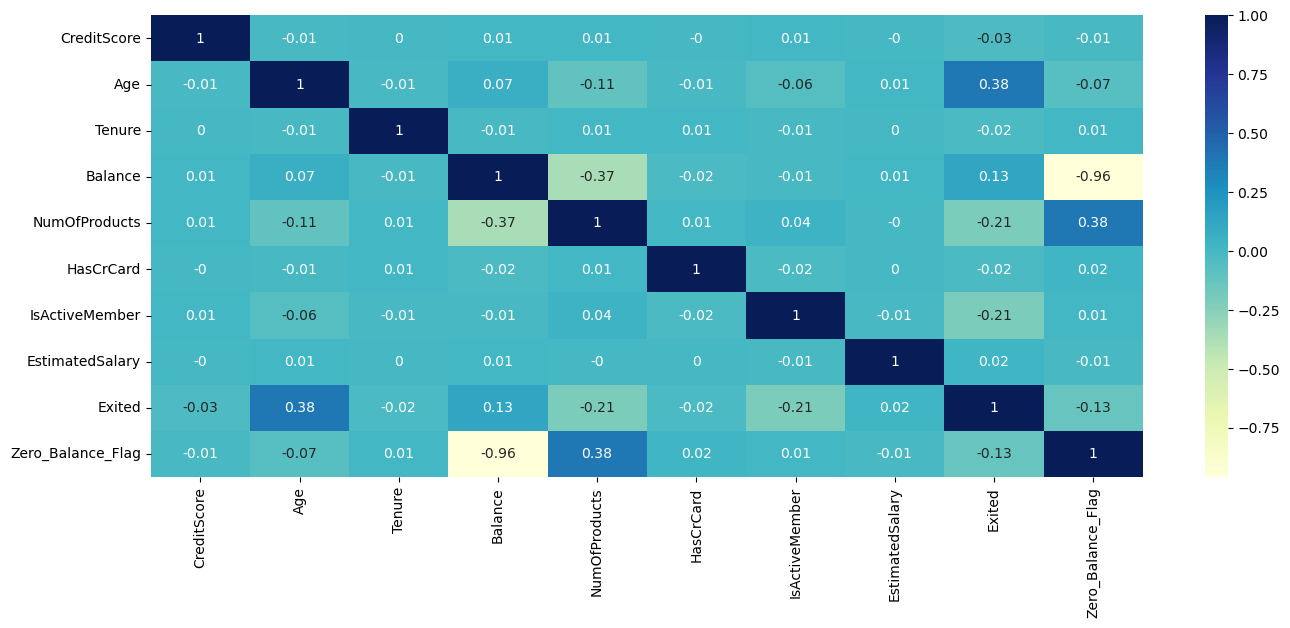

In [675]:
# 2.m.Korelasyon Tablosununum Hazırlanması
plt.figure(figsize=(16, 6))
dataplot = sns.heatmap(train_clean.iloc[:,[3,6,7,8,9,10,11,12,13,14]].corr().round(2), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [676]:
train_clean.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Zero_Balance_Flag'],
      dtype='object')

# Bağımsız değişken seçimi

In [677]:
def estimated_salary_bin(salary):
    if salary < 50000:
        return 'Low'
    elif 50000 <= salary < 100000:
        return 'Medium'
    else:
        return 'High'

In [678]:
train_clean.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag
0,0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,1.0,0.0,181449.97,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,1.0,1.0,49503.50,0,1
2,2,15694510,Hsueh,678,France,Male,40,10,0.00,2,1.0,0.0,184866.69,0,1
3,3,15741417,Kao,581,France,Male,34,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,1.0,1.0,15068.83,0,1


In [679]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158400 entries, 0 to 165033
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   id                 158400 non-null  int64   
 1   CustomerId         158400 non-null  int64   
 2   Surname            158400 non-null  object  
 3   CreditScore        158400 non-null  int64   
 4   Geography          158400 non-null  object  
 5   Gender             158400 non-null  object  
 6   Age                158400 non-null  int32   
 7   Tenure             158400 non-null  int64   
 8   Balance            158400 non-null  float64 
 9   NumOfProducts      158400 non-null  int64   
 10  HasCrCard          158400 non-null  float64 
 11  IsActiveMember     158400 non-null  float64 
 12  EstimatedSalary    158400 non-null  float64 
 13  Exited             158400 non-null  category
 14  Zero_Balance_Flag  158400 non-null  int64   
dtypes: category(1), float64(4), int32(1), i

In [680]:
train_clean["Exited"] = train_clean["Exited"].astype(int)

In [681]:
train_clean['GeographyChurnRate'] = train_clean.groupby('Geography')['Exited'].transform('mean')

In [682]:
train_clean['Age_Group'] = pd.cut(train_clean['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])

In [683]:
train_clean['Credit_Score_Group'] = pd.cut(train_clean['CreditScore'], bins=[300, 600, 750, 850], labels=['Low', 'Medium', 'High'])

In [684]:
train_clean['EstimatedSalaryGroup'] = train_clean['EstimatedSalary'].apply(estimated_salary_bin)

In [685]:
train_clean['AgeSquared'] = train_clean['Age'] ** 2
train_clean['TenureSquared'] = train_clean['Tenure'] ** 2

In [686]:
train_clean

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Exited,Zero_Balance_Flag,GeographyChurnRate,Age_Group,Credit_Score_Group,EstimatedSalaryGroup,AgeSquared,TenureSquared
0,0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,...,0.0,181449.97,0,1,0.159434,Middle-aged,Medium,High,1089,9
1,1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,...,1.0,49503.50,0,1,0.159434,Middle-aged,Medium,Low,1089,1
2,2,15694510,Hsueh,678,France,Male,40,10,0.00,2,...,0.0,184866.69,0,1,0.159434,Middle-aged,Medium,High,1600,100
3,3,15741417,Kao,581,France,Male,34,2,148882.54,1,...,1.0,84560.88,0,0,0.159434,Middle-aged,Low,Medium,1156,4
4,4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,...,1.0,15068.83,0,1,0.165980,Middle-aged,Medium,Low,1089,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33,2,0.00,1,...,1.0,131834.75,0,1,0.165980,Middle-aged,Medium,High,1089,4
165030,165030,15665521,Okechukwu,792,France,Male,35,3,0.00,1,...,0.0,131834.45,0,1,0.159434,Middle-aged,High,High,1225,9
165031,165031,15664752,Hsia,565,France,Male,31,5,0.00,1,...,1.0,127429.56,0,1,0.159434,Middle-aged,Low,High,961,25
165032,165032,15689614,Hsiung,554,Spain,Female,30,7,161533.00,1,...,1.0,71173.03,0,0,0.165980,Young,Low,Medium,900,49


In [687]:
train_clean['AgeGroupChurnRate'] = train_clean.groupby('Age_Group')['Exited'].transform('mean')

In [688]:
train_clean['ProductChurnRate'] = train_clean.groupby('NumOfProducts')['Exited'].transform('mean')

In [689]:
train_clean['CreditScoreGroupChurnRate'] = train_clean.groupby('Credit_Score_Group')['Exited'].transform('mean')

In [703]:
train_clean['IsActiveMemberChurnRate'] = train_clean.groupby('IsActiveMember')['Exited'].transform('mean')

In [704]:
train_clean.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Zero_Balance_Flag',
       'GeographyChurnRate', 'Age_Group', 'Credit_Score_Group',
       'EstimatedSalaryGroup', 'AgeSquared', 'TenureSquared',
       'AgeGroupChurnRate', 'ProductChurnRate', 'CreditScoreGroupChurnRate',
       'IsActiveMemberChurnRate'],
      dtype='object')

In [584]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158400 entries, 0 to 165033
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    158400 non-null  int64   
 1   CustomerId            158400 non-null  int64   
 2   Surname               158400 non-null  object  
 3   CreditScore           158400 non-null  int64   
 4   Geography             158400 non-null  object  
 5   Gender                158400 non-null  object  
 6   Age                   158400 non-null  int32   
 7   Tenure                158400 non-null  int64   
 8   Balance               158400 non-null  float64 
 9   NumOfProducts         158400 non-null  int64   
 10  HasCrCard             158400 non-null  float64 
 11  IsActiveMember        158400 non-null  float64 
 12  EstimatedSalary       158400 non-null  float64 
 13  Exited                158400 non-null  int32   
 14  Zero_Balance_Flag     158400 non-null  in

# Özellik seçimi 

In [339]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158400 entries, 0 to 165033
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   id                 158400 non-null  int64   
 1   CustomerId         158400 non-null  int64   
 2   Surname            158400 non-null  object  
 3   CreditScore        158400 non-null  int64   
 4   Geography          158400 non-null  object  
 5   Gender             158400 non-null  object  
 6   Age                158400 non-null  int32   
 7   Tenure             158400 non-null  int64   
 8   Balance            158400 non-null  float64 
 9   NumOfProducts      158400 non-null  int64   
 10  HasCrCard          158400 non-null  float64 
 11  IsActiveMember     158400 non-null  float64 
 12  EstimatedSalary    158400 non-null  float64 
 13  Exited             158400 non-null  category
 14  Zero_Balance_Flag  158400 non-null  int64   
dtypes: category(1), float64(4), int32(1), i

In [705]:
X = train_clean.iloc[:,3:26]
y = train_clean["Exited"]

In [706]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,GeographyChurnRate,Age_Group,Credit_Score_Group,EstimatedSalaryGroup,AgeSquared,TenureSquared,AgeGroupChurnRate,ProductChurnRate,CreditScoreGroupChurnRate,IsActiveMemberChurnRate
0,668,France,Male,33,3,0.00,2,1.0,0.0,181449.97,...,0.159434,Middle-aged,Medium,High,1089,9,0.20254,0.058124,0.198631,0.286114
1,627,France,Male,33,1,0.00,2,1.0,1.0,49503.50,...,0.159434,Middle-aged,Medium,Low,1089,1,0.20254,0.058124,0.198631,0.119732
2,678,France,Male,40,10,0.00,2,1.0,0.0,184866.69,...,0.159434,Middle-aged,Medium,High,1600,100,0.20254,0.058124,0.198631,0.286114
3,581,France,Male,34,2,148882.54,1,1.0,1.0,84560.88,...,0.159434,Middle-aged,Low,Medium,1156,4,0.20254,0.338491,0.222279,0.119732
4,716,Spain,Male,33,5,0.00,2,1.0,1.0,15068.83,...,0.165980,Middle-aged,Medium,Low,1089,25,0.20254,0.058124,0.198631,0.119732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33,2,0.00,1,1.0,1.0,131834.75,...,0.165980,Middle-aged,Medium,High,1089,4,0.20254,0.338491,0.198631,0.119732
165030,792,France,Male,35,3,0.00,1,0.0,0.0,131834.45,...,0.159434,Middle-aged,High,High,1225,9,0.20254,0.338491,0.197392,0.286114
165031,565,France,Male,31,5,0.00,1,1.0,1.0,127429.56,...,0.159434,Middle-aged,Low,High,961,25,0.20254,0.338491,0.222279,0.119732
165032,554,Spain,Female,30,7,161533.00,1,0.0,1.0,71173.03,...,0.165980,Young,Low,Medium,900,49,0.08244,0.338491,0.222279,0.119732


In [707]:
X.drop("Exited", axis = 1, inplace = True)

In [694]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158400 entries, 0 to 165033
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   CreditScore                158400 non-null  int64   
 1   Geography                  158400 non-null  object  
 2   Gender                     158400 non-null  object  
 3   Age                        158400 non-null  int32   
 4   Tenure                     158400 non-null  int64   
 5   Balance                    158400 non-null  float64 
 6   NumOfProducts              158400 non-null  int64   
 7   HasCrCard                  158400 non-null  float64 
 8   IsActiveMember             158400 non-null  float64 
 9   EstimatedSalary            158400 non-null  float64 
 10  Zero_Balance_Flag          158400 non-null  int64   
 11  GeographyChurnRate         158400 non-null  float64 
 12  Age_Group                  158400 non-null  category
 13  Credit_Score_Group 

In [695]:
y

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 158400, dtype: int32

In [696]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Zero_Balance_Flag,GeographyChurnRate,Age_Group,Credit_Score_Group,EstimatedSalaryGroup,AgeSquared,TenureSquared,AgeGroupChurnRate,ProductChurnRate,CreditScoreGroupChurnRate
0,668,France,Male,33,3,0.00,2,1.0,0.0,181449.97,1,0.159434,Middle-aged,Medium,High,1089,9,0.20254,0.058124,0.198631
1,627,France,Male,33,1,0.00,2,1.0,1.0,49503.50,1,0.159434,Middle-aged,Medium,Low,1089,1,0.20254,0.058124,0.198631
2,678,France,Male,40,10,0.00,2,1.0,0.0,184866.69,1,0.159434,Middle-aged,Medium,High,1600,100,0.20254,0.058124,0.198631
3,581,France,Male,34,2,148882.54,1,1.0,1.0,84560.88,0,0.159434,Middle-aged,Low,Medium,1156,4,0.20254,0.338491,0.222279
4,716,Spain,Male,33,5,0.00,2,1.0,1.0,15068.83,1,0.165980,Middle-aged,Medium,Low,1089,25,0.20254,0.058124,0.198631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33,2,0.00,1,1.0,1.0,131834.75,1,0.165980,Middle-aged,Medium,High,1089,4,0.20254,0.338491,0.198631
165030,792,France,Male,35,3,0.00,1,0.0,0.0,131834.45,1,0.159434,Middle-aged,High,High,1225,9,0.20254,0.338491,0.197392
165031,565,France,Male,31,5,0.00,1,1.0,1.0,127429.56,1,0.159434,Middle-aged,Low,High,961,25,0.20254,0.338491,0.222279
165032,554,Spain,Female,30,7,161533.00,1,0.0,1.0,71173.03,0,0.165980,Young,Low,Medium,900,49,0.08244,0.338491,0.222279


In [708]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [709]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,GeographyChurnRate,Age_Group,Credit_Score_Group,EstimatedSalaryGroup,AgeSquared,TenureSquared,AgeGroupChurnRate,ProductChurnRate,CreditScoreGroupChurnRate,IsActiveMemberChurnRate
88079,683,France,Male,41,8,0.00,2,1.0,0.0,142400.28,...,0.159434,Middle-aged,Medium,High,1681,64,0.20254,0.058124,0.198631,0.286114
90187,775,France,Female,40,9,0.00,2,0.0,1.0,58978.61,...,0.159434,Middle-aged,High,Medium,1600,81,0.20254,0.058124,0.197392,0.119732
50569,667,Spain,Male,43,9,98546.29,1,1.0,1.0,107815.31,...,0.165980,Middle-aged,Medium,High,1849,81,0.20254,0.338491,0.198631,0.119732
2125,679,Germany,Female,42,9,132726.55,3,0.0,0.0,101089.76,...,0.369401,Middle-aged,Medium,High,1764,81,0.20254,0.881033,0.198631,0.286114
155181,629,France,Male,34,2,0.00,2,0.0,1.0,180595.02,...,0.159434,Middle-aged,Medium,High,1156,4,0.20254,0.058124,0.198631,0.119732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124867,764,France,Male,35,6,117302.62,1,1.0,0.0,68701.73,...,0.159434,Middle-aged,High,Medium,1225,36,0.20254,0.338491,0.197392,0.286114
108005,632,France,Male,38,8,0.00,2,1.0,0.0,146891.07,...,0.159434,Middle-aged,Medium,High,1444,64,0.20254,0.058124,0.198631,0.286114
137392,682,Germany,Female,34,1,138053.79,1,1.0,1.0,142956.48,...,0.369401,Middle-aged,Medium,High,1156,1,0.20254,0.338491,0.198631,0.119732
152984,709,France,Male,39,4,0.00,2,1.0,1.0,140941.47,...,0.159434,Middle-aged,Medium,High,1521,16,0.20254,0.058124,0.198631,0.119732


In [69]:
y_train

88079     0
90187     0
50569     0
2125      1
155181    0
         ..
124867    0
108005    0
137392    0
152984    0
127014    1
Name: Exited, Length: 106128, dtype: category
Categories (2, int64): [0, 1]

In [70]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Zero_Balance_Flag
77720,679,France,Male,40,3,119501.88,1,0.0,0.0,46774.94,0
101036,678,France,Female,25,4,0.00,3,1.0,1.0,131501.72,1
113662,646,Spain,Male,36,8,0.00,2,1.0,0.0,69052.67,1
45435,766,Spain,Female,30,7,127806.83,1,1.0,0.0,71139.35,0
21567,643,France,Female,31,3,167949.48,1,1.0,0.0,143162.34,0
...,...,...,...,...,...,...,...,...,...,...,...
18877,517,France,Female,39,1,0.00,2,1.0,1.0,78955.80,1
40396,683,France,Male,38,9,78885.88,2,1.0,0.0,121789.30,0
162896,850,France,Male,36,9,0.00,2,1.0,1.0,190611.92,1
64951,656,France,Male,37,5,0.00,2,1.0,0.0,57553.98,1


In [370]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106128 entries, 88079 to 127014
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   CreditScore         106128 non-null  int64   
 1   Geography           106128 non-null  object  
 2   Gender              106128 non-null  object  
 3   Age                 106128 non-null  int32   
 4   Tenure              106128 non-null  int64   
 5   Balance             106128 non-null  float64 
 6   NumOfProducts       106128 non-null  int64   
 7   HasCrCard           106128 non-null  float64 
 8   IsActiveMember      106128 non-null  float64 
 9   EstimatedSalary     106128 non-null  float64 
 10  Zero_Balance_Flag   106128 non-null  int64   
 11  GeographyChurnRate  106128 non-null  float64 
 12  Age_Group           106128 non-null  category
 13  Tenure_per_Product  106128 non-null  float64 
dtypes: category(1), float64(6), int32(1), int64(4), object(2)
memory usag

In [710]:
#4.e.Kukla Değişken İşlemleri (Dummy Variable)
#'Age_Group','Credit_Score_Group','EstimatedSalaryGroup'
from sklearn.preprocessing import OneHotEncoder
kukla_değişkenler=["Geography",'Gender','Age_Group','Credit_Score_Group','EstimatedSalaryGroup']
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first')
ohe.fit(X_train[kukla_değişkenler])

def get_ohe(df):
    temp_df = pd.DataFrame(data=ohe.transform(df[kukla_değişkenler]), columns=ohe.get_feature_names_out())
    df.drop(columns=kukla_değişkenler, axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

X_train = get_ohe(X_train)
X_test = get_ohe(X_test)

# Model kurma

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [258]:
models = {
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
}

In [259]:
scores = {}

In [260]:
for model_name, model in models.items():
    model.fit(X_res, y_res)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores[model_name] = score
    print(f"{model_name}: {score}")

SVC: 0.7067263544536272
RandomForestClassifier: 0.8581075910621365
GradientBoostingClassifier: 0.8629285277012549
DecisionTreeClassifier: 0.7995676461585552


In [261]:
sorted_scores = sorted(scores.items(), key=lambda item: item[1], reverse=True)
print("\nSorted Scores:")
for model_name, score in sorted_scores:
    print(f"{model_name}: {score}")


Sorted Scores:
GradientBoostingClassifier: 0.8629285277012549
RandomForestClassifier: 0.8581075910621365
DecisionTreeClassifier: 0.7995676461585552
SVC: 0.7067263544536272


In [262]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_res_scale = scaler.fit_transform(X_res)
X_test_scale = scaler.fit_transform(X_test)

In [263]:
svc = SVC()

In [267]:
svc.fit(X_res_scale,y_res)

SVC()

In [268]:
y_pred = svc.predict(X_test_scale)

In [269]:
accuracy_score(y_test, y_pred)

0.8568640955004592

# MODEL KURMA

In [270]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Zero_Balance_Flag,GeographyChurnRate,...,TenureSquared,Geography_Germany,Geography_Spain,Gender_Male,Age_Group_Senior,Age_Group_Young,Credit_Score_Group_Low,Credit_Score_Group_Medium,EstimatedSalaryGroup_Low,EstimatedSalaryGroup_Medium
0,683,41,8,0.00,2,1.0,0.0,142400.28,1,0.159434,...,64,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,775,40,9,0.00,2,0.0,1.0,58978.61,1,0.159434,...,81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,667,43,9,98546.29,1,1.0,1.0,107815.31,0,0.165980,...,81,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,679,42,9,132726.55,3,0.0,0.0,101089.76,0,0.369401,...,81,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,629,34,2,0.00,2,0.0,1.0,180595.02,1,0.159434,...,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106123,764,35,6,117302.62,1,1.0,0.0,68701.73,0,0.159434,...,36,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
106124,632,38,8,0.00,2,1.0,0.0,146891.07,1,0.159434,...,64,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
106125,682,34,1,138053.79,1,1.0,1.0,142956.48,0,0.369401,...,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
106126,709,39,4,0.00,2,1.0,1.0,140941.47,1,0.159434,...,16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [294]:
gbr = GradientBoostingClassifier()

In [711]:
gbr.fit(X_train,y_train)

GradientBoostingClassifier()

In [712]:
y_pred_test = gbr.predict(X_test)
y_pred_train = gbr.predict(X_train)

In [713]:
accuracy_score(y_test, y_pred_test)

0.8680938169574534

In [714]:
accuracy_score(y_train, y_pred_train)

0.8681874717322479

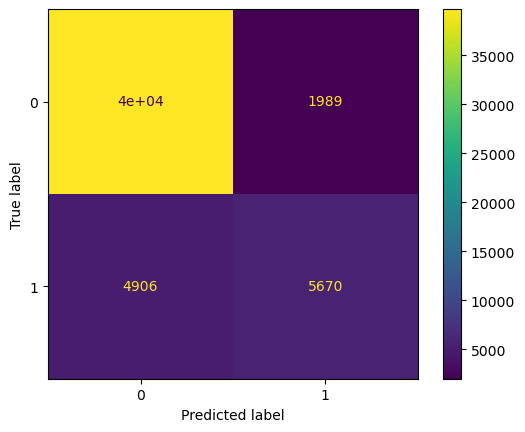

In [738]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

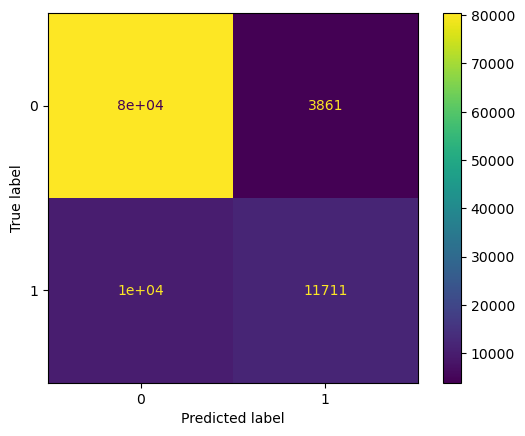

In [739]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

# Grid Search

In [740]:
param_grid = {
    'n_estimators': [250, 300, 350],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'subsample': [1.0],    
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [741]:
grid_search = GridSearchCV(estimator=gbr,param_grid=param_grid, n_jobs=1, cv = 3, scoring = "accuracy")

In [742]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [250, 300, 350], 'subsample': [1.0]},
             scoring='accuracy')

In [743]:
grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 350,
 'subsample': 1.0}

In [744]:
y_pred_gs_test=grid_search.predict(X_test)

y_pred_gs_train = grid_search.predict(X_train)

In [745]:
accuracy_score(y_test, y_pred_gs_test)

0.8687059993878176

In [746]:
accuracy_score(y_train, y_pred_gs_train)

0.8718717020955827

# Train için sonuçlar

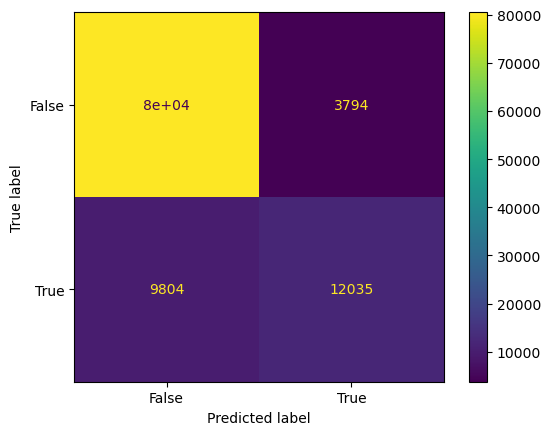

In [748]:
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_gs_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [749]:
training_data_prediction_score = grid_search.score(X_train, y_train)
test_data_prediction_score = grid_search.score(X_test, y_test)
print(training_data_prediction_score,test_data_prediction_score)

0.8718717020955827 0.8687059993878176


In [750]:
accuracy_train = metrics.accuracy_score(y_train, y_pred_gs_train)# Model ne sıklıkla doğru tahmin yapıyor?
accuracy_train

0.8718717020955827

In [751]:
Misclassification_Rate_train = 1-accuracy_train # Model ne sıklıkla yanlış tahmin yapıyor?
Misclassification_Rate_train

0.12812829790441727

In [752]:
Sensitivity_recall_train = metrics.recall_score(y_train, y_pred_gs_train)# Model yüzde kaç sıklıkla pozitif(1) tahmin ediliyor?
Sensitivity_recall_train

0.5510783460781171

In [753]:
Specificity_train = metrics.recall_score(y_train, y_pred_gs_train, pos_label=0)# Model olumsuz sonuçları (0) tahmin etmede ne kadar iyi?
Specificity_train

0.9549881953754346

In [754]:
Precision_train = metrics.precision_score(y_train, y_pred_gs_train)# Pozitif tahminler (1), ne sıklıkla doğrudur?
Precision_train

0.7603133489165456

In [755]:
F1_score_train = metrics.f1_score(y_train, y_pred_gs_train)#F-score is the "harmonic mean" of precision and sensitivity.
F1_score_train

0.6390039290644579

# Test için sonuçlar

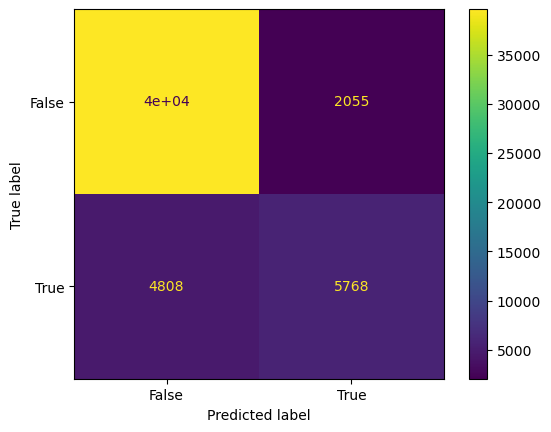

In [756]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gs_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [757]:
accuracy_test = metrics.accuracy_score(y_test, y_pred_gs_test)# Model ne sıklıkla doğru tahmin yapıyor?
accuracy_test

0.8687059993878176

In [758]:
Misclassification_Rate_test = 1-accuracy_test # Model ne sıklıkla yanlış tahmin yapıyor?
Misclassification_Rate_test

0.13129400061218244

In [759]:
Sensitivity_recall_test = metrics.recall_score(y_test, y_pred_gs_test)# Model yüzde kaç sıklıkla pozitif(1) tahmin ediliyor?
Sensitivity_recall_test

0.5453857791225416

In [760]:
Specificity_test = metrics.recall_score(y_test, y_pred_gs_test, pos_label=0)# Model olumsuz sonuçları (0) tahmin etmede ne kadar iyi?
Specificity_test

0.9507146968534151

In [761]:
Precision_test = metrics.precision_score(y_test, y_pred_gs_test)# Pozitif tahminler (1), ne sıklıkla doğrudur?
Precision_test

0.7373130512591077

In [762]:
F1_score_test = metrics.f1_score(y_test, y_pred_gs_test)#F-score is the "harmonic mean" of precision and sensitivity.
F1_score_test

0.6269905973150715